# EDA for Crop data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<ipython-input-63-9f3c265310fb>:61: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-63-9f3c265310fb>:61: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-63-9f3c265310fb>:91: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-63-9f3c

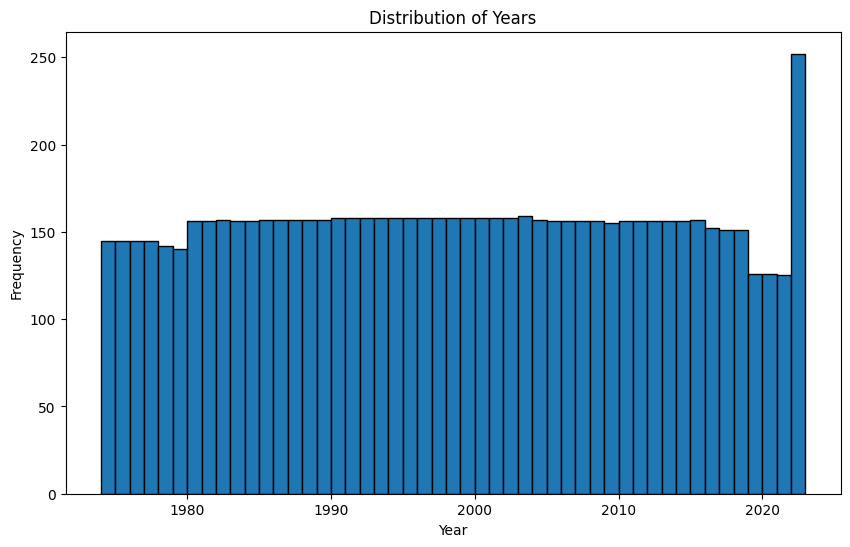

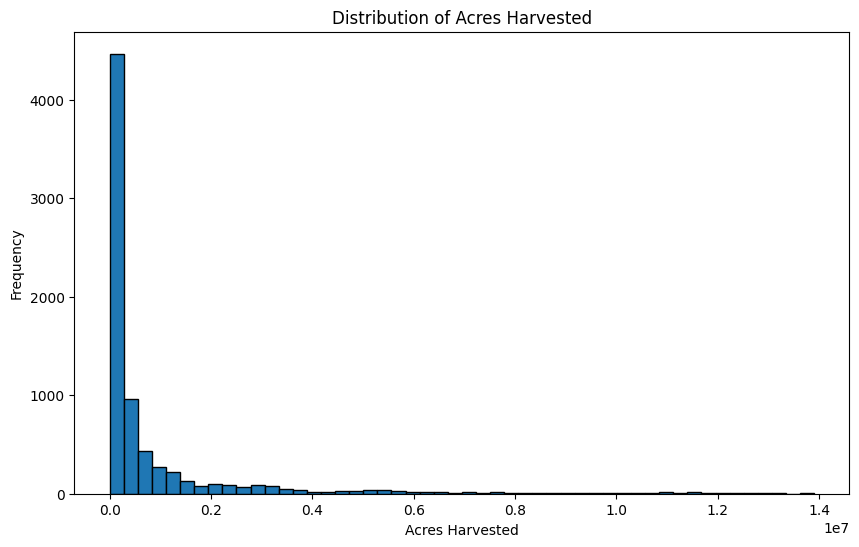

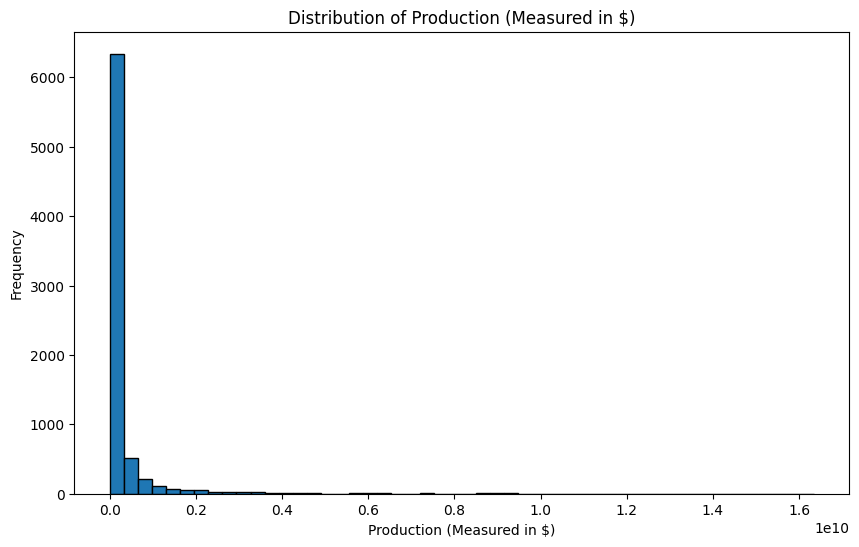

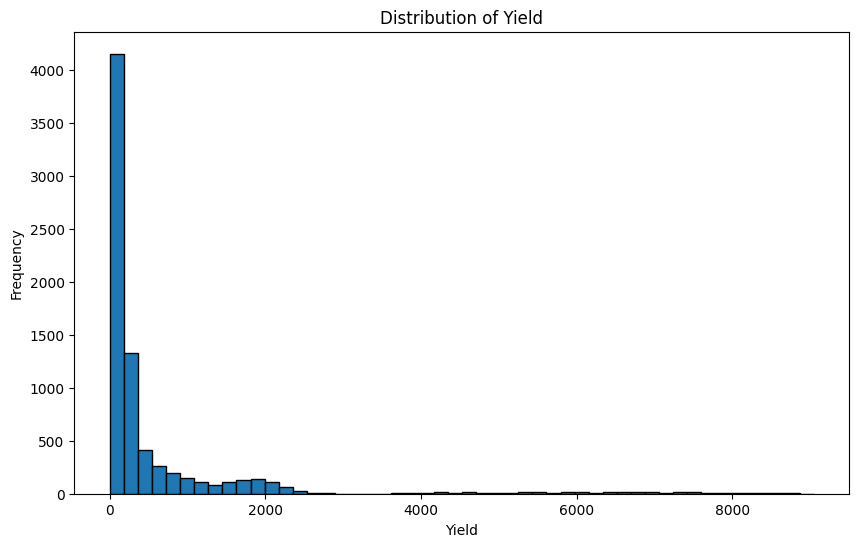

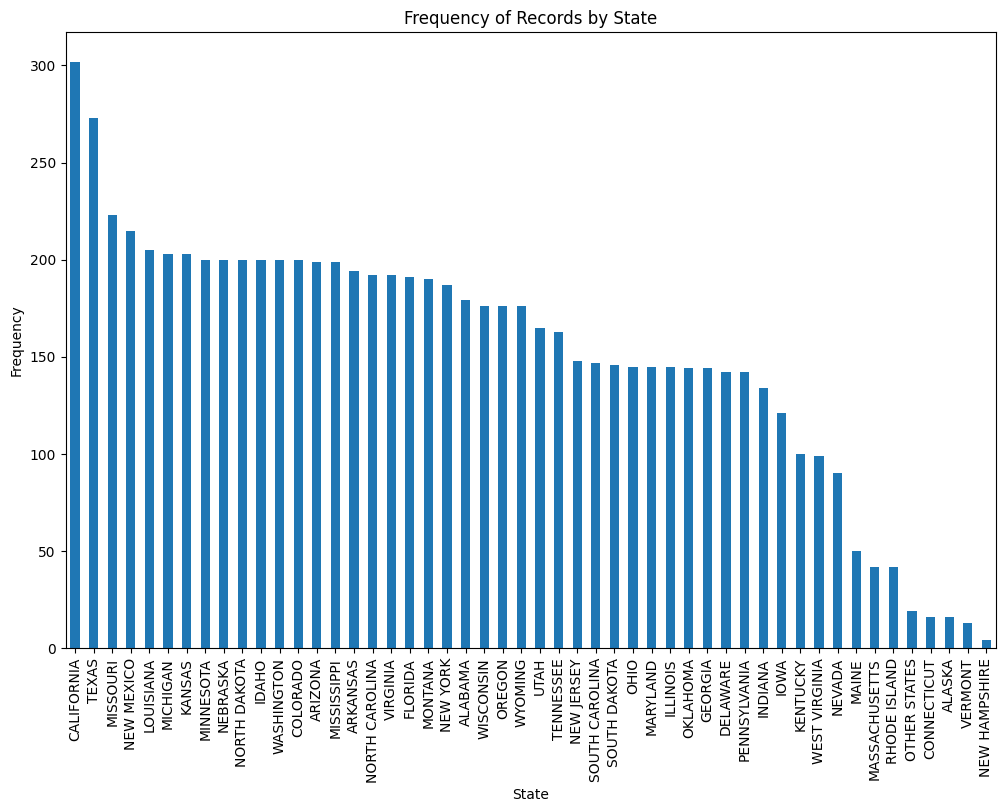

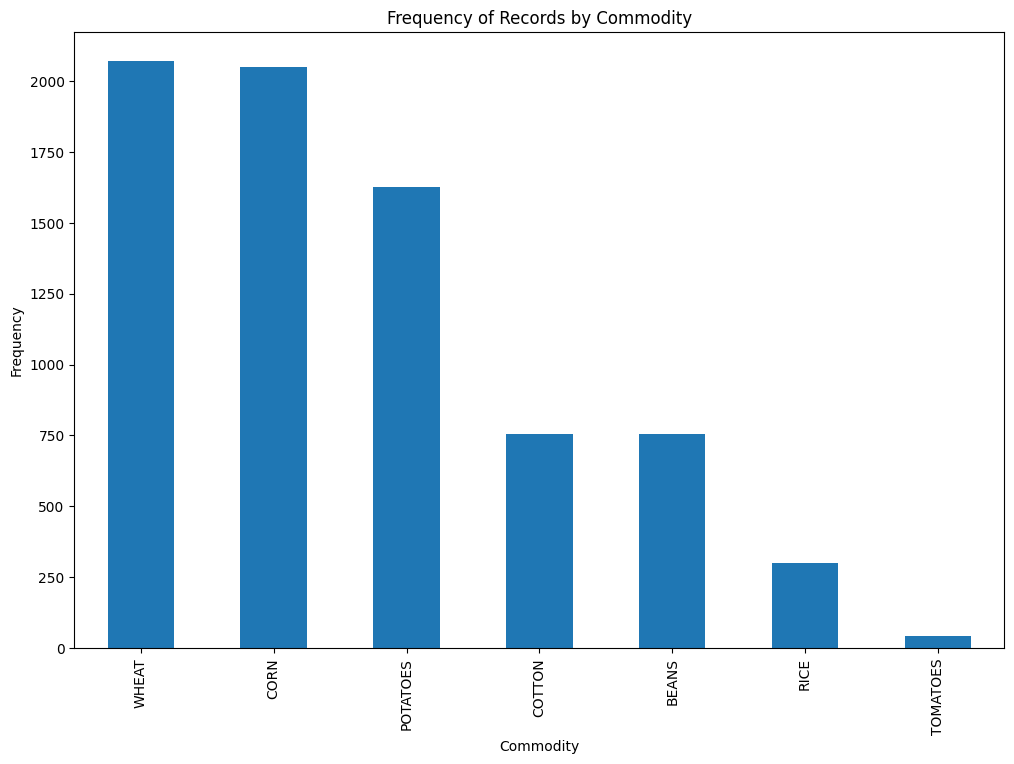

   Year       State Commodity  ACRES HARVESTED  PRODUCTION, MEASURED IN $  \
0  1974     ALABAMA     WHEAT          95000.0                  2233000.0   
1  1974     ARIZONA     WHEAT         200000.0                 13000000.0   
2  1974    ARKANSAS     WHEAT         330000.0                  8745000.0   
3  1974  CALIFORNIA     WHEAT         750000.0                 37500000.0   
4  1974    COLORADO     WHEAT        2900000.0                 72625000.0   

   YIELD  
0   23.5  
1   65.0  
2   26.5  
3   50.0  
4   25.0  


In [ ]:
import pandas as pd

# Load the CSV files
path = '/content/drive/My Drive/GoodNotes/Agricultural Data/'
rice_df = pd.read_csv(path + 'Rice.csv')
beans_df = pd.read_csv(path + 'Beans.csv')
cotton_df = pd.read_csv(path + 'Cotton.csv')
tomaten_df = pd.read_csv(path + 'Tomaten.csv')
wheat_df = pd.read_csv(path + 'Wheat.csv')
potato_df = pd.read_csv(path + 'Potato.csv')
corn_df = pd.read_csv(path + 'Corn.csv')

# Function to rename columns consistently
def rename_columns(df, old_names, new_names):
    df.rename(columns=dict(zip(old_names, new_names)), inplace=True)
    return df

# Define specific data items to keep and rename for wheat
wheat_data_items = [
    'WHEAT - ACRES HARVESTED',
    'WHEAT - PRODUCTION, MEASURED IN BU',
    'WHEAT - YIELD, MEASURED IN BU / ACRE'
]
wheat_new_names = ['ACRES HARVESTED', 'PRODUCTION, MEASURED IN $', 'YIELD']

# Filter wheat_df for the specific data items
wheat_df = wheat_df[wheat_df['Data Item'].isin(wheat_data_items)]

# Create new columns for each data item and fill with corresponding values
for item in wheat_data_items:
    wheat_df[item] = wheat_df.apply(lambda row: row['Value'] if row['Data Item'] == item else None, axis=1)

# Drop the original 'Data Item' and 'Value' columns
wheat_df.drop(columns=['Data Item', 'Value'], inplace=True)

# Group by 'Year', 'State', 'Commodity' and aggregate to combine the new columns
final_wheat_df = wheat_df.groupby(['Year', 'State', 'Commodity']).agg(
    {
        'WHEAT - ACRES HARVESTED': 'first',
        'WHEAT - PRODUCTION, MEASURED IN BU': 'first',
        'WHEAT - YIELD, MEASURED IN BU / ACRE': 'first'
    }
).reset_index()

# Rename columns
final_wheat_df = rename_columns(final_wheat_df, wheat_data_items, wheat_new_names)

# Define the specific data items to keep and rename for potato
potato_data_items = [
    'POTATOES - ACRES HARVESTED',
    'POTATOES - PRODUCTION, MEASURED IN $',
    'POTATOES - YIELD, MEASURED IN CWT / ACRE'
]
potato_new_names = ['ACRES HARVESTED', 'PRODUCTION, MEASURED IN $', 'YIELD']

# Filter potato_df for the specific data items
potato_df = potato_df[potato_df['Data Item'].isin(potato_data_items)]

# Create new columns for each data item and fill with corresponding values
for item in potato_data_items:
    potato_df[item] = potato_df.apply(lambda row: row['Value'] if row['Data Item'] == item else None, axis=1)

# Drop the original 'Data Item' and 'Value' columns
potato_df.drop(columns=['Data Item', 'Value'], inplace=True)

# Group by 'Year', 'State', 'Commodity' and aggregate to combine the new columns
final_potato_df = potato_df.groupby(['Year', 'State', 'Commodity']).agg(
    {
        'POTATOES - ACRES HARVESTED': 'first',
        'POTATOES - PRODUCTION, MEASURED IN $': 'first',
        'POTATOES - YIELD, MEASURED IN CWT / ACRE': 'first'
    }
).reset_index()

# Rename columns
final_potato_df = rename_columns(final_potato_df, potato_data_items, potato_new_names)

# Define the specific data items to keep and rename for tomaten
tomaten_data_items = [
    'TOMATOES, IN THE OPEN - ACRES HARVESTED',
    'TOMATOES, IN THE OPEN - PRODUCTION, MEASURED IN $',
    'TOMATOES, IN THE OPEN - YIELD, MEASURED IN CWT / ACRE'
]
tomaten_new_names = ['ACRES HARVESTED', 'PRODUCTION, MEASURED IN $', 'YIELD']

# Filter tomaten_df for the specific data items
tomaten_df = tomaten_df[tomaten_df['Data Item'].isin(tomaten_data_items)]

# Create new columns for each data item and fill with corresponding values
for item in tomaten_data_items:
    tomaten_df[item] = tomaten_df.apply(lambda row: row['Value'] if row['Data Item'] == item else None, axis=1)

# Drop the original 'Data Item' and 'Value' columns
tomaten_df.drop(columns=['Data Item', 'Value'], inplace=True)

# Group by 'Year', 'State', 'Commodity' and aggregate to combine the new columns
final_tomaten_df = tomaten_df.groupby(['Year', 'State', 'Commodity']).agg(
    {
        'TOMATOES, IN THE OPEN - ACRES HARVESTED': 'first',
        'TOMATOES, IN THE OPEN - PRODUCTION, MEASURED IN $': 'first',
        'TOMATOES, IN THE OPEN - YIELD, MEASURED IN CWT / ACRE': 'first'
    }
).reset_index()

# Rename columns
final_tomaten_df = rename_columns(final_tomaten_df, tomaten_data_items, tomaten_new_names)

# Define the specific data items to keep and rename for corn
corn_data_items = [
    'CORN, GRAIN - ACRES HARVESTED',
    'CORN, GRAIN - PRODUCTION, MEASURED IN $',
    'CORN, GRAIN - YIELD, MEASURED IN BU / ACRE'
]
corn_new_names = ['ACRES HARVESTED', 'PRODUCTION, MEASURED IN $', 'YIELD']

# Filter corn_df for the specific data items
corn_df = corn_df[corn_df['Data Item'].isin(corn_data_items)]

# Create new columns for each data item and fill with corresponding values
for item in corn_data_items:
    corn_df[item] = corn_df.apply(lambda row: row['Value'] if row['Data Item'] == item else None, axis=1)

# Drop the original 'Data Item' and 'Value' columns
corn_df.drop(columns=['Data Item', 'Value'], inplace=True)

# Group by 'Year', 'State', 'Commodity' and aggregate to combine the new columns
final_corn_df = corn_df.groupby(['Year', 'State', 'Commodity']).agg(
    {
        'CORN, GRAIN - ACRES HARVESTED': 'first',
        'CORN, GRAIN - PRODUCTION, MEASURED IN $': 'first',
        'CORN, GRAIN - YIELD, MEASURED IN BU / ACRE': 'first'
    }
).reset_index()

# Rename columns
final_corn_df = rename_columns(final_corn_df, corn_data_items, corn_new_names)

# Define the specific data items to keep and rename for rice
rice_data_items = [
    'RICE - ACRES HARVESTED',
    'RICE - PRODUCTION, MEASURED IN $',
    'RICE - YIELD, MEASURED IN LB / ACRE'
]
rice_new_names = ['ACRES HARVESTED', 'PRODUCTION, MEASURED IN $', 'YIELD']

# Filter rice_df for the specific data items
rice_df = rice_df[rice_df['Data Item'].isin(rice_data_items)]

# Create new columns for each data item and fill with corresponding values
for item in rice_data_items:
    rice_df[item] = rice_df.apply(lambda row: row['Value'] if row['Data Item'] == item else None, axis=1)

# Drop the original 'Data Item' and 'Value' columns
rice_df.drop(columns=['Data Item', 'Value'], inplace=True)

# Group by 'Year', 'State', 'Commodity' and aggregate to combine the new columns
final_rice_df = rice_df.groupby(['Year', 'State', 'Commodity']).agg(
    {
        'RICE - ACRES HARVESTED': 'first',
        'RICE - PRODUCTION, MEASURED IN $': 'first',
        'RICE - YIELD, MEASURED IN LB / ACRE': 'first'
    }
).reset_index()

# Rename columns
final_rice_df = rename_columns(final_rice_df, rice_data_items, rice_new_names)

# Define the specific data items to keep and rename for cotton
cotton_data_items = [
    'COTTON, UPLAND - ACRES HARVESTED',
    'COTTON, UPLAND - PRODUCTION, MEASURED IN $',
    'COTTON, UPLAND - YIELD, MEASURED IN LB / ACRE'
]
cotton_new_names = ['ACRES HARVESTED', 'PRODUCTION, MEASURED IN $', 'YIELD']

# Filter cotton_df for the specific data items
cotton_df = cotton_df[cotton_df['Data Item'].isin(cotton_data_items)]

# Create new columns for each data item and fill with corresponding values
for item in cotton_data_items:
    cotton_df[item] = cotton_df.apply(lambda row: row['Value'] if row['Data Item'] == item else None, axis=1)

# Drop the original 'Data Item' and 'Value' columns
cotton_df.drop(columns=['Data Item', 'Value'], inplace=True)

# Group by 'Year', 'State', 'Commodity' and aggregate to combine the new columns
final_cotton_df = cotton_df.groupby(['Year', 'State', 'Commodity']).agg(
    {
        'COTTON, UPLAND - ACRES HARVESTED': 'first',
        'COTTON, UPLAND - PRODUCTION, MEASURED IN $': 'first',
        'COTTON, UPLAND - YIELD, MEASURED IN LB / ACRE': 'first'
    }
).reset_index()

# Rename columns
final_cotton_df = rename_columns(final_cotton_df, cotton_data_items, cotton_new_names)

# Define the specific data items to keep and rename for beans
beans_data_items_excl_chickpeas = [
    'BEANS, DRY EDIBLE, (EXCL CHICKPEAS) - ACRES HARVESTED',
    'BEANS, DRY EDIBLE, (EXCL CHICKPEAS) - PRODUCTION, MEASURED IN $',
    'BEANS, DRY EDIBLE, (EXCL CHICKPEAS) - YIELD, MEASURED IN LB / ACRE'
]

beans_data_items_incl_chickpeas = [
    'BEANS, DRY EDIBLE, INCL CHICKPEAS - ACRES HARVESTED',
    'BEANS, DRY EDIBLE, INCL CHICKPEAS - PRODUCTION, MEASURED IN $',
    'BEANS, DRY EDIBLE, INCL CHICKPEAS - YIELD, MEASURED IN LB / ACRE'
]

beans_new_names = ['ACRES HARVESTED', 'PRODUCTION, MEASURED IN $', 'YIELD']

# Filter beans_df for the specific data items (both incl and excl chickpeas)
beans_df_filtered = beans_df[beans_df['Data Item'].isin(beans_data_items_excl_chickpeas + beans_data_items_incl_chickpeas)]

# Create new columns for each data item and fill with corresponding values
for excl_item, incl_item in zip(beans_data_items_excl_chickpeas, beans_data_items_incl_chickpeas):
    beans_df_filtered[excl_item] = beans_df_filtered.apply(
        lambda row: row['Value'] if row['Data Item'] in [excl_item, incl_item] else None, axis=1)

# Drop the original 'Data Item' and 'Value' columns
beans_df_filtered.drop(columns=['Data Item', 'Value'], inplace=True)

# Group by 'Year', 'State', 'Commodity' and aggregate to combine the new columns
final_beans_df = beans_df_filtered.groupby(['Year', 'State', 'Commodity']).agg(
    {
        'BEANS, DRY EDIBLE, (EXCL CHICKPEAS) - ACRES HARVESTED': 'first',
        'BEANS, DRY EDIBLE, (EXCL CHICKPEAS) - PRODUCTION, MEASURED IN $': 'first',
        'BEANS, DRY EDIBLE, (EXCL CHICKPEAS) - YIELD, MEASURED IN LB / ACRE': 'first'
    }
).reset_index()

# Rename columns
final_beans_df = rename_columns(final_beans_df, beans_data_items_excl_chickpeas, beans_new_names)

# Combine all final DataFrames into one big DataFrame
combined_df = pd.concat([
    final_wheat_df, final_potato_df, final_tomaten_df, final_corn_df, final_rice_df, final_cotton_df, final_beans_df
], ignore_index=True)

# Assuming the combined DataFrame is already created and named 'combined_df'
# Drop rows with any remaining missing values
combined_df = combined_df.dropna()

# Convert the relevant columns to numeric (we don't have 'Value' column anymore; we'll focus on the numeric columns we created)
# Create a function to remove commas and convert to numeric
def clean_and_convert(column):
    return pd.to_numeric(combined_df[column].str.replace(',', ''), errors='coerce')

# Apply the function to all relevant columns
numeric_columns = ['ACRES HARVESTED', 'PRODUCTION, MEASURED IN $', 'YIELD']
for column in numeric_columns:
    combined_df[column] = clean_and_convert(column)

# Save the combined DataFrame to Google Drive
output_path = '/content/drive/My Drive/GoodNotes/Agricultural Data/combined_agricultural_data.csv'
combined_df.to_csv(output_path, index=False)

# Generate histograms for numeric columns

# Histogram for 'Year'
plt.figure(figsize=(10, 6))
plt.hist(combined_df['Year'], bins=range(int(combined_df['Year'].min()), int(combined_df['Year'].max()) + 1), edgecolor='black')
plt.title('Distribution of Years')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

# Histogram for 'ACRES HARVESTED'
plt.figure(figsize=(10, 6))
plt.hist(combined_df['ACRES HARVESTED'], bins=50, edgecolor='black')
plt.title('Distribution of Acres Harvested')
plt.xlabel('Acres Harvested')
plt.ylabel('Frequency')
plt.show()

# Histogram for 'PRODUCTION, MEASURED IN $'
plt.figure(figsize=(10, 6))
plt.hist(combined_df['PRODUCTION, MEASURED IN $'], bins=50, edgecolor='black')
plt.title('Distribution of Production (Measured in $)')
plt.xlabel('Production (Measured in $)')
plt.ylabel('Frequency')
plt.show()

# Histogram for 'YIELD'
plt.figure(figsize=(10, 6))
plt.hist(combined_df['YIELD'], bins=50, edgecolor='black')
plt.title('Distribution of Yield')
plt.xlabel('Yield')
plt.ylabel('Frequency')
plt.show()

# Bar plot for 'State'
plt.figure(figsize=(12, 8))
combined_df['State'].value_counts().plot(kind='bar')
plt.title('Frequency of Records by State')
plt.xlabel('State')
plt.ylabel('Frequency')
plt.show()

# Bar plot for 'Commodity'
plt.figure(figsize=(12, 8))
combined_df['Commodity'].value_counts().plot(kind='bar')
plt.title('Frequency of Records by Commodity')
plt.xlabel('Commodity')
plt.ylabel('Frequency')
plt.show()

# Display the first few rows of the combined DataFrame
print(combined_df.head())

This script performs the following steps:

Loads the individual crop CSV files into DataFrames.
Concatenates the DataFrames into a single DataFrame.
Drops columns with a large percentage of missing values.
Removes rows with any remaining missing values.
Identifies and removes non-numeric entries in the Value column.
Converts the cleaned Value column to numeric.
Generates histograms for the Year and Value columns.
Generates bar plots for the State, Commodity, and Data Item columns.

Step 1: Basic Information and Summary Statistics


In [ ]:
import pandas as pd

# Display basic information about the dataframe
print("Basic Information:")
print(combined_df.info())

# Calculate summary statistics for numerical columns
print("\nSummary Statistics:")
print(combined_df.describe())

Basic Information:
<class 'pandas.core.frame.DataFrame'>
Index: 7543 entries, 0 to 7728
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       7543 non-null   int64  
 1   State                      7543 non-null   object 
 2   Commodity                  7543 non-null   object 
 3   ACRES HARVESTED            7543 non-null   float64
 4   PRODUCTION, MEASURED IN $  7543 non-null   float64
 5   YIELD                      7543 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 412.5+ KB
None

Summary Statistics:
              Year  ACRES HARVESTED  PRODUCTION, MEASURED IN $        YIELD
count  7543.000000     7.543000e+03               7.543000e+03  7543.000000
mean   1998.090680     9.554931e+05               3.014095e+08   599.590123
std      14.062095     2.082588e+06               9.810377e+08  1273.982137
min    1974.000000     0.000000e+00   

Step 2: Missing Values Analysis


Missing Values:
Year                         0
State                        0
Commodity                    0
ACRES HARVESTED              0
PRODUCTION, MEASURED IN $    0
YIELD                        0
dtype: int64


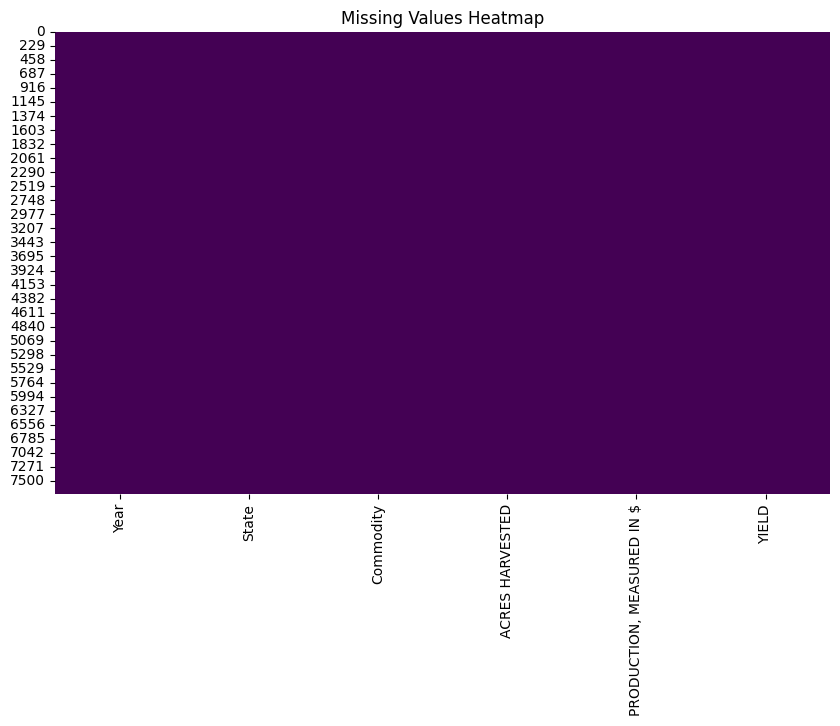

In [ ]:
# Check for missing values
missing_values = combined_df.isnull().sum()
print("\nMissing Values:")
print(missing_values)

# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(combined_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

Step 3: Data Distribution and Trends

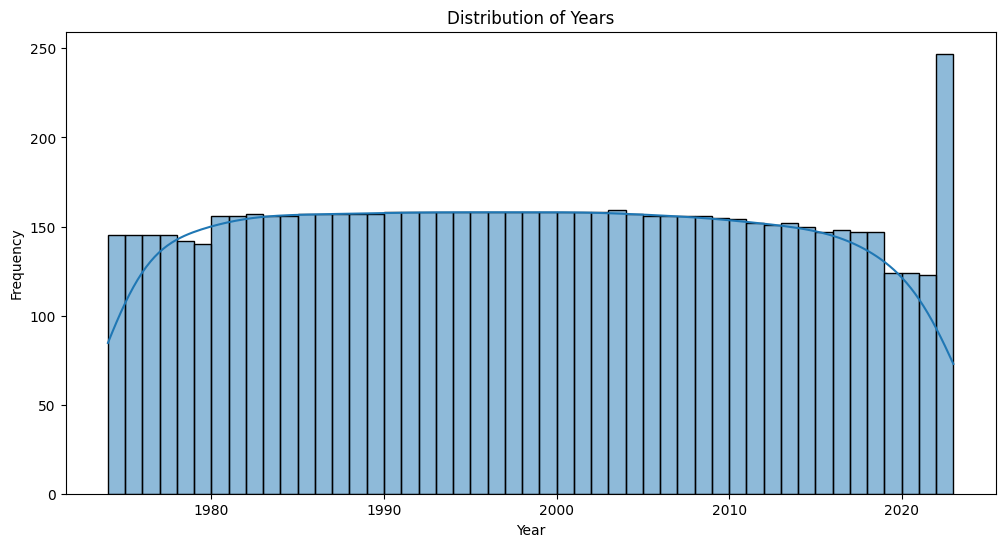

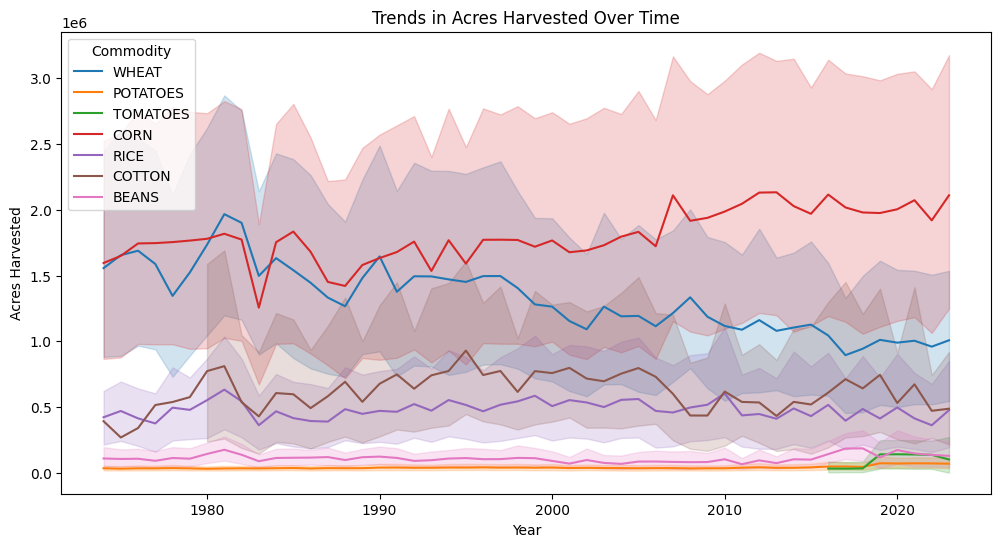

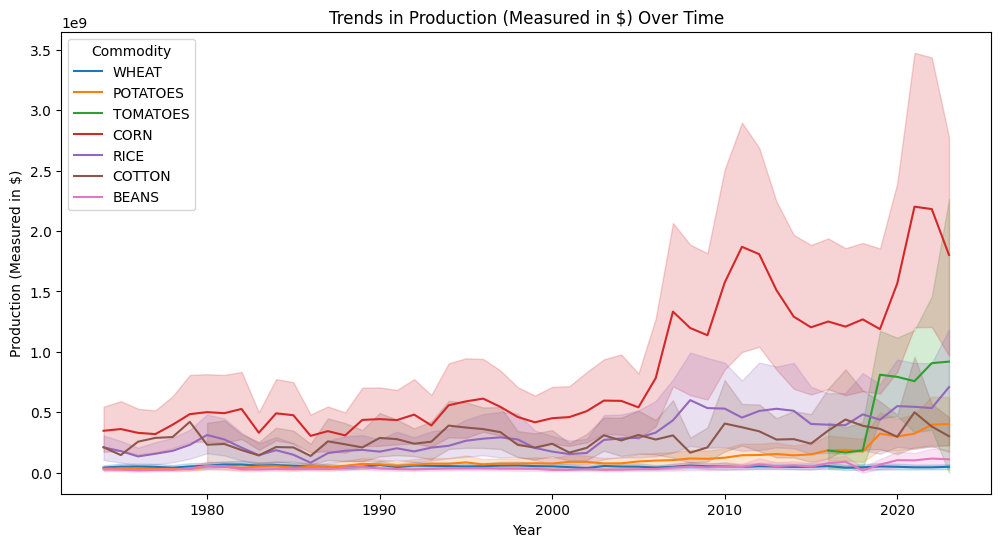

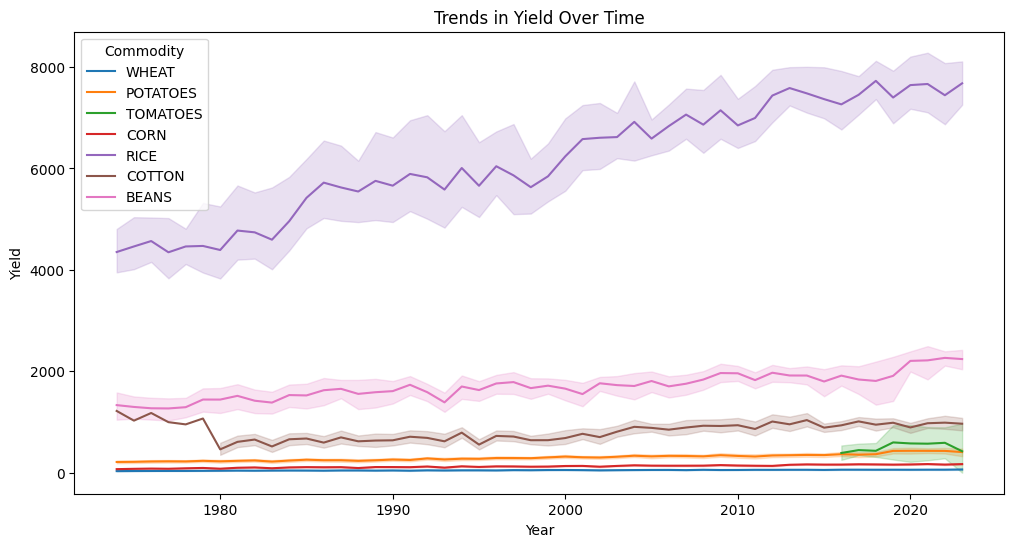

   Year       State Commodity  ACRES HARVESTED  PRODUCTION, MEASURED IN $  \
0  1974     ALABAMA     WHEAT          95000.0                  2233000.0   
1  1974     ARIZONA     WHEAT         200000.0                 13000000.0   
2  1974    ARKANSAS     WHEAT         330000.0                  8745000.0   
3  1974  CALIFORNIA     WHEAT         750000.0                 37500000.0   
4  1974    COLORADO     WHEAT        2900000.0                 72625000.0   

   YIELD  
0   23.5  
1   65.0  
2   26.5  
3   50.0  
4   25.0  


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure that the combined DataFrame is cleaned as in the previous steps
combined_df = combined_df.dropna()

# Convert the relevant columns to numeric if not already done
def clean_and_convert(column):
    combined_df[column] = combined_df[column].astype(str).str.replace(',', '')
    return pd.to_numeric(combined_df[column], errors='coerce')

numeric_columns = ['ACRES HARVESTED', 'PRODUCTION, MEASURED IN $', 'YIELD']
for column in numeric_columns:
    combined_df[column] = clean_and_convert(column)

# Drop rows with any remaining NaN values after conversion
combined_df = combined_df.dropna()

# Visualize the distribution of crop yields over the years
plt.figure(figsize=(12, 6))
sns.histplot(combined_df['Year'], bins=range(int(combined_df['Year'].min()), int(combined_df['Year'].max()) + 1), kde=True)
plt.title('Distribution of Years')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

# Analyze trends for different crops for ACRES HARVESTED
plt.figure(figsize=(12, 6))
sns.lineplot(data=combined_df, x='Year', y='ACRES HARVESTED', hue='Commodity')
plt.title('Trends in Acres Harvested Over Time')
plt.xlabel('Year')
plt.ylabel('Acres Harvested')
plt.legend(title='Commodity')
plt.show()

# Analyze trends for different crops for PRODUCTION, MEASURED IN $
plt.figure(figsize=(12, 6))
sns.lineplot(data=combined_df, x='Year', y='PRODUCTION, MEASURED IN $', hue='Commodity')
plt.title('Trends in Production (Measured in $) Over Time')
plt.xlabel('Year')
plt.ylabel('Production (Measured in $)')
plt.legend(title='Commodity')
plt.show()

# Analyze trends for different crops for YIELD
plt.figure(figsize=(12, 6))
sns.lineplot(data=combined_df, x='Year', y='YIELD', hue='Commodity')
plt.title('Trends in Yield Over Time')
plt.xlabel('Year')
plt.ylabel('Yield')
plt.legend(title='Commodity')
plt.show()

# Display the first few rows of the combined DataFrame
print(combined_df.head())

Step 4: Categorical Data Analysis

In [ ]:
# Frequency analysis of categorical variables
print("\nFrequency of Records by State:")
print(combined_df['State'].value_counts())

print("\nFrequency of Records by Commodity:")
print(combined_df['Commodity'].value_counts())


Frequency of Records by State:
State
CALIFORNIA        293
TEXAS             272
MISSOURI          223
LOUISIANA         205
MICHIGAN          203
NEW MEXICO        203
IDAHO             200
KANSAS            200
NORTH DAKOTA      200
WASHINGTON        200
COLORADO          200
MINNESOTA         200
MISSISSIPPI       199
NEBRASKA          199
ARKANSAS          194
VIRGINIA          192
FLORIDA           191
ARIZONA           191
MONTANA           190
NORTH CAROLINA    189
NEW YORK          185
ALABAMA           179
WISCONSIN         176
OREGON            176
WYOMING           176
UTAH              165
TENNESSEE         163
SOUTH CAROLINA    147
SOUTH DAKOTA      146
OHIO              145
ILLINOIS          145
OKLAHOMA          144
GEORGIA           144
MARYLAND          143
NEW JERSEY        143
PENNSYLVANIA      142
DELAWARE          141
INDIANA           134
IOWA              121
KENTUCKY          100
WEST VIRGINIA      99
NEVADA             84
MAINE              50
MASSACHUSETTS   

Step 5: Correlation Analysis

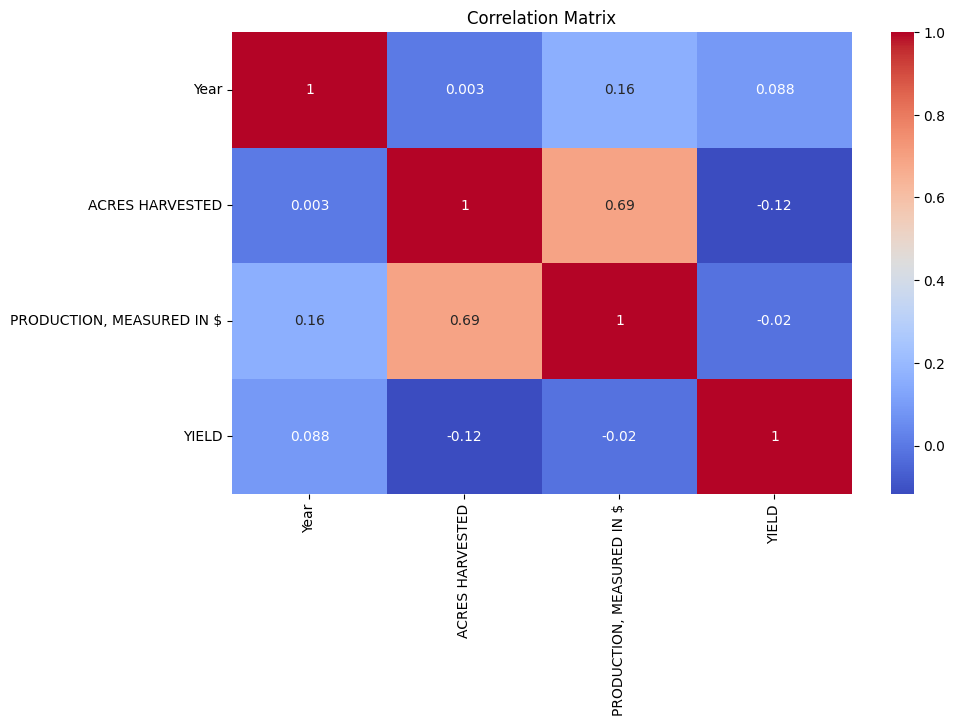

In [ ]:
# Calculate correlation matrix for numeric columns only
numeric_df = combined_df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Step 6: Detailed Visualizations

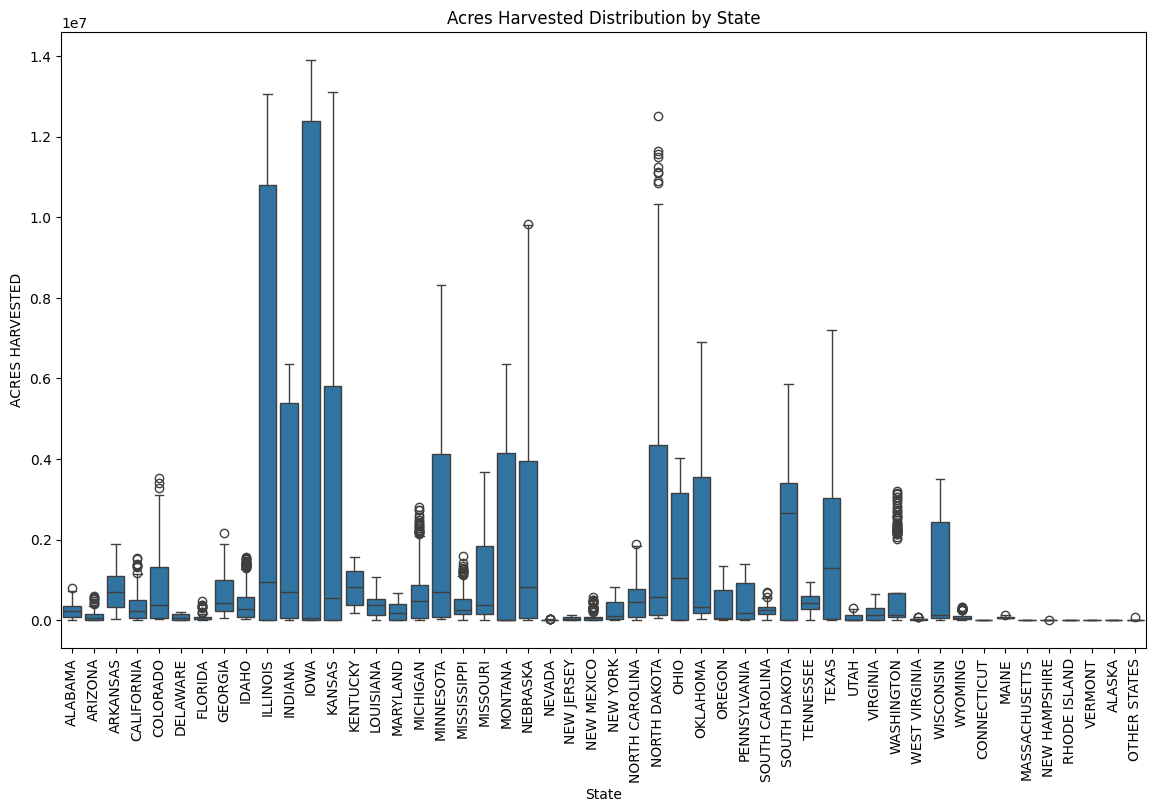

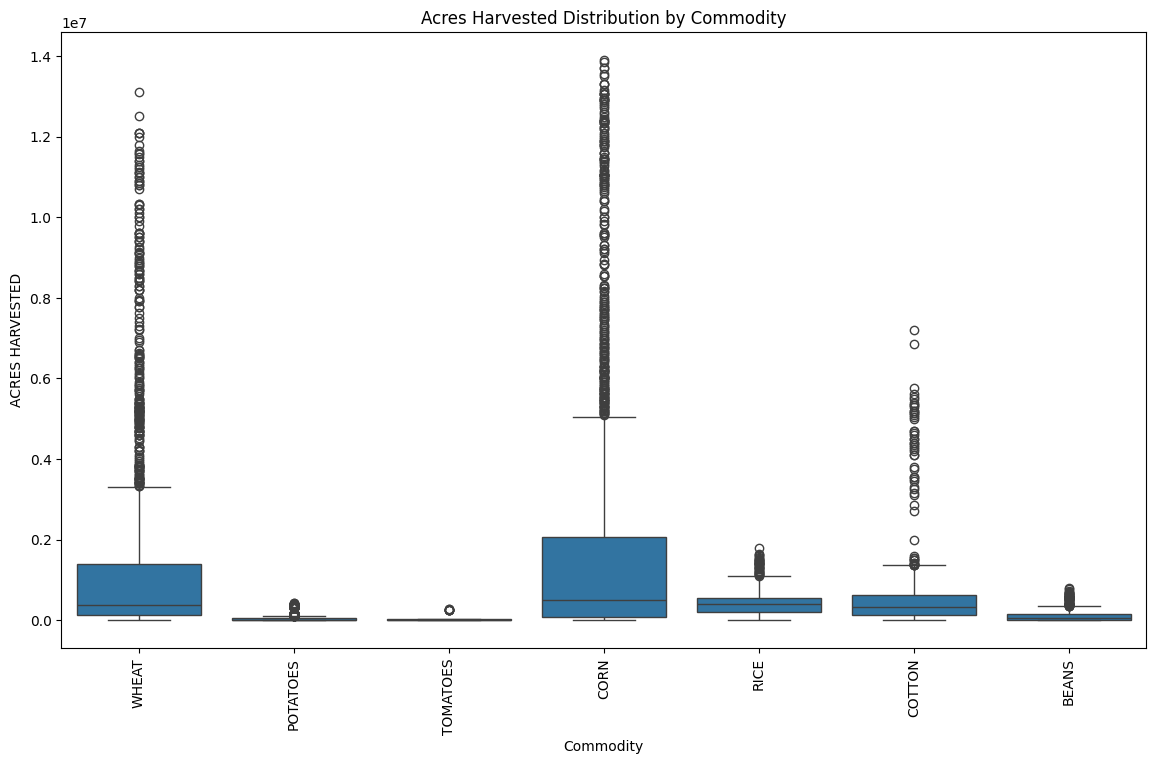

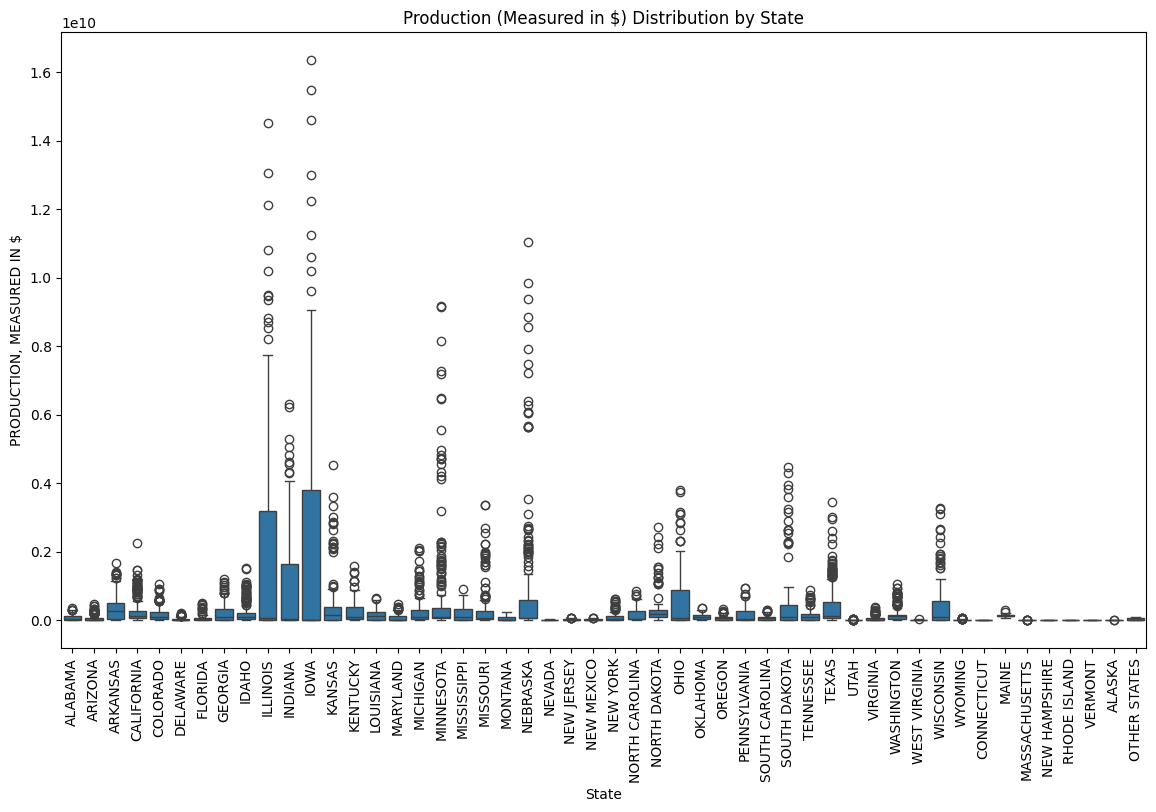

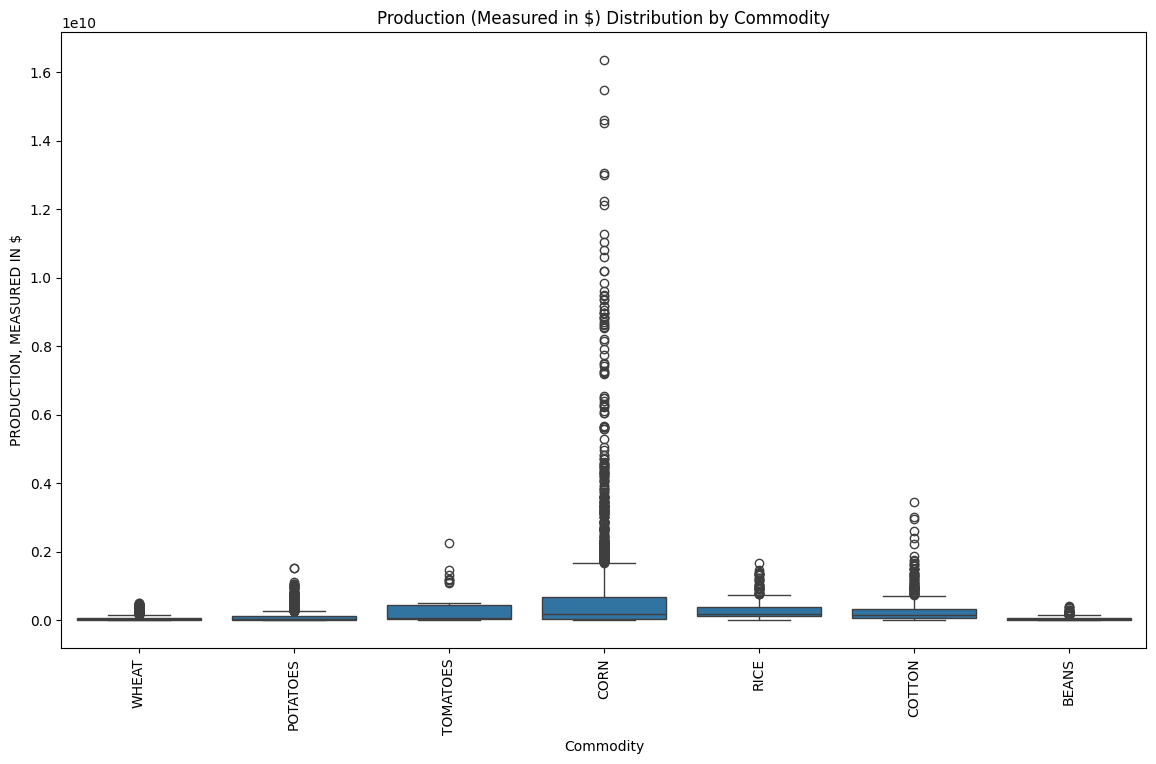

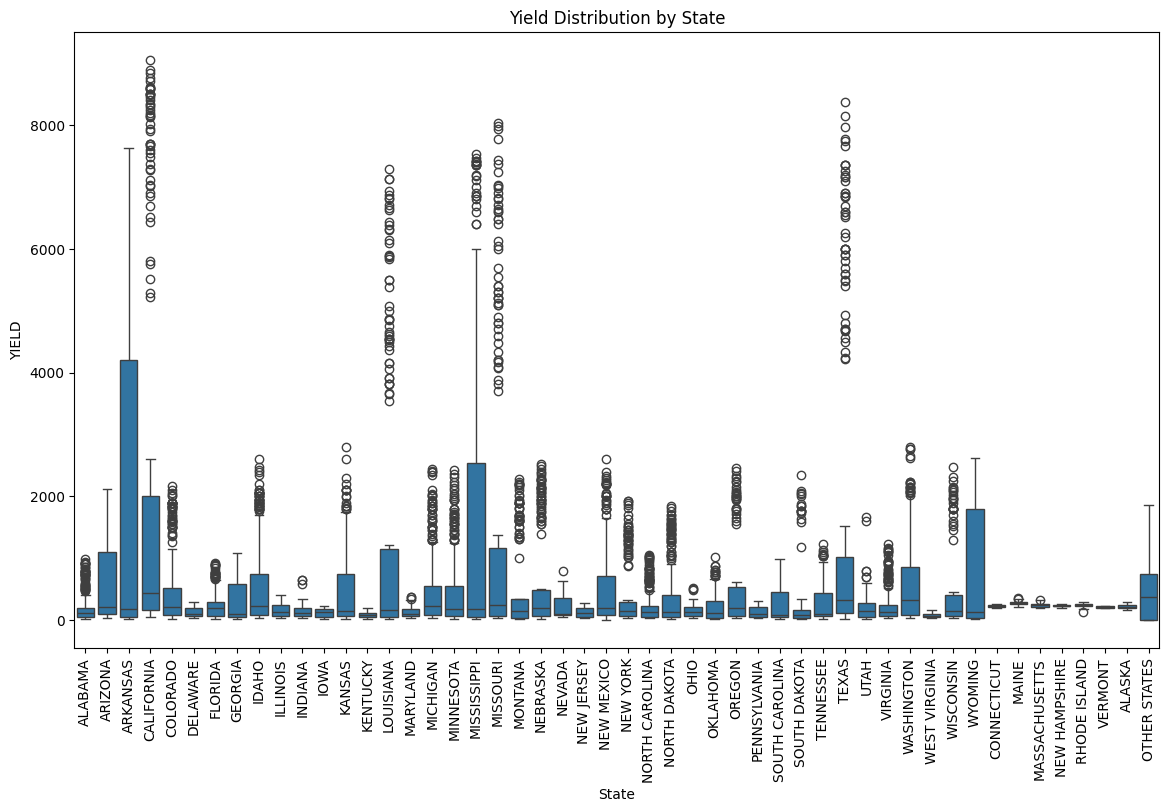

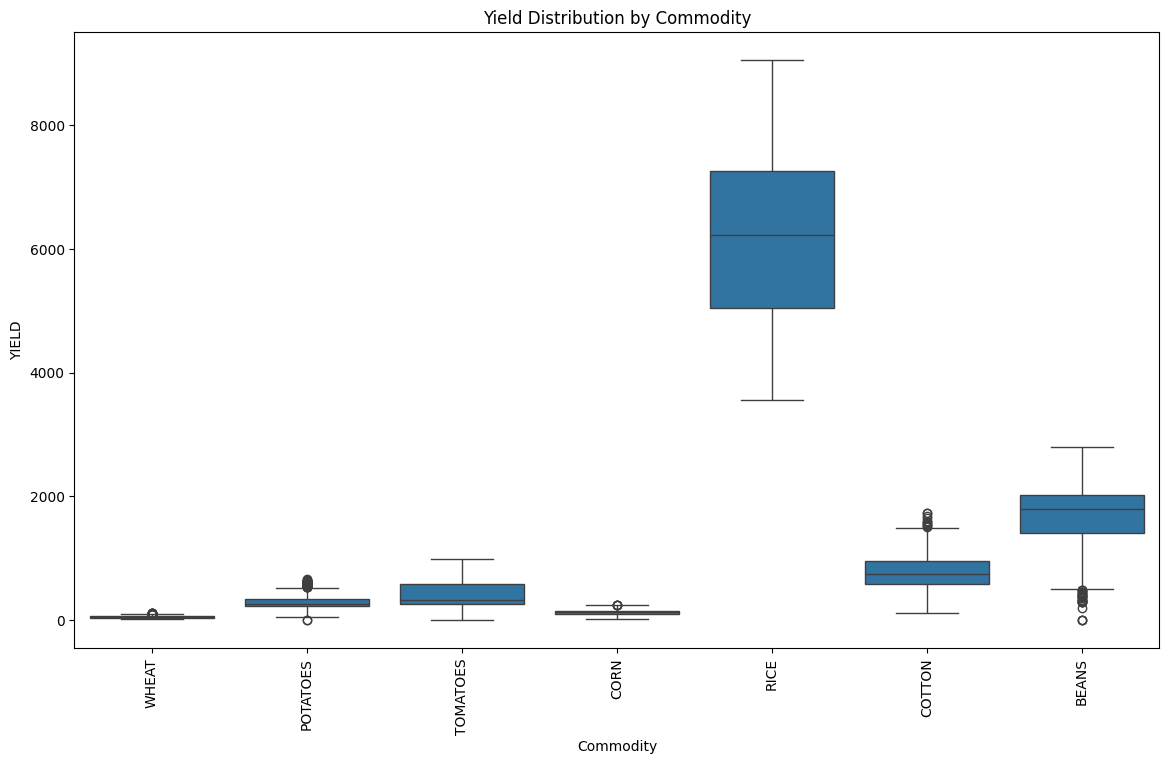

<ipython-input-57-9e57d8a96ea4>:46: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




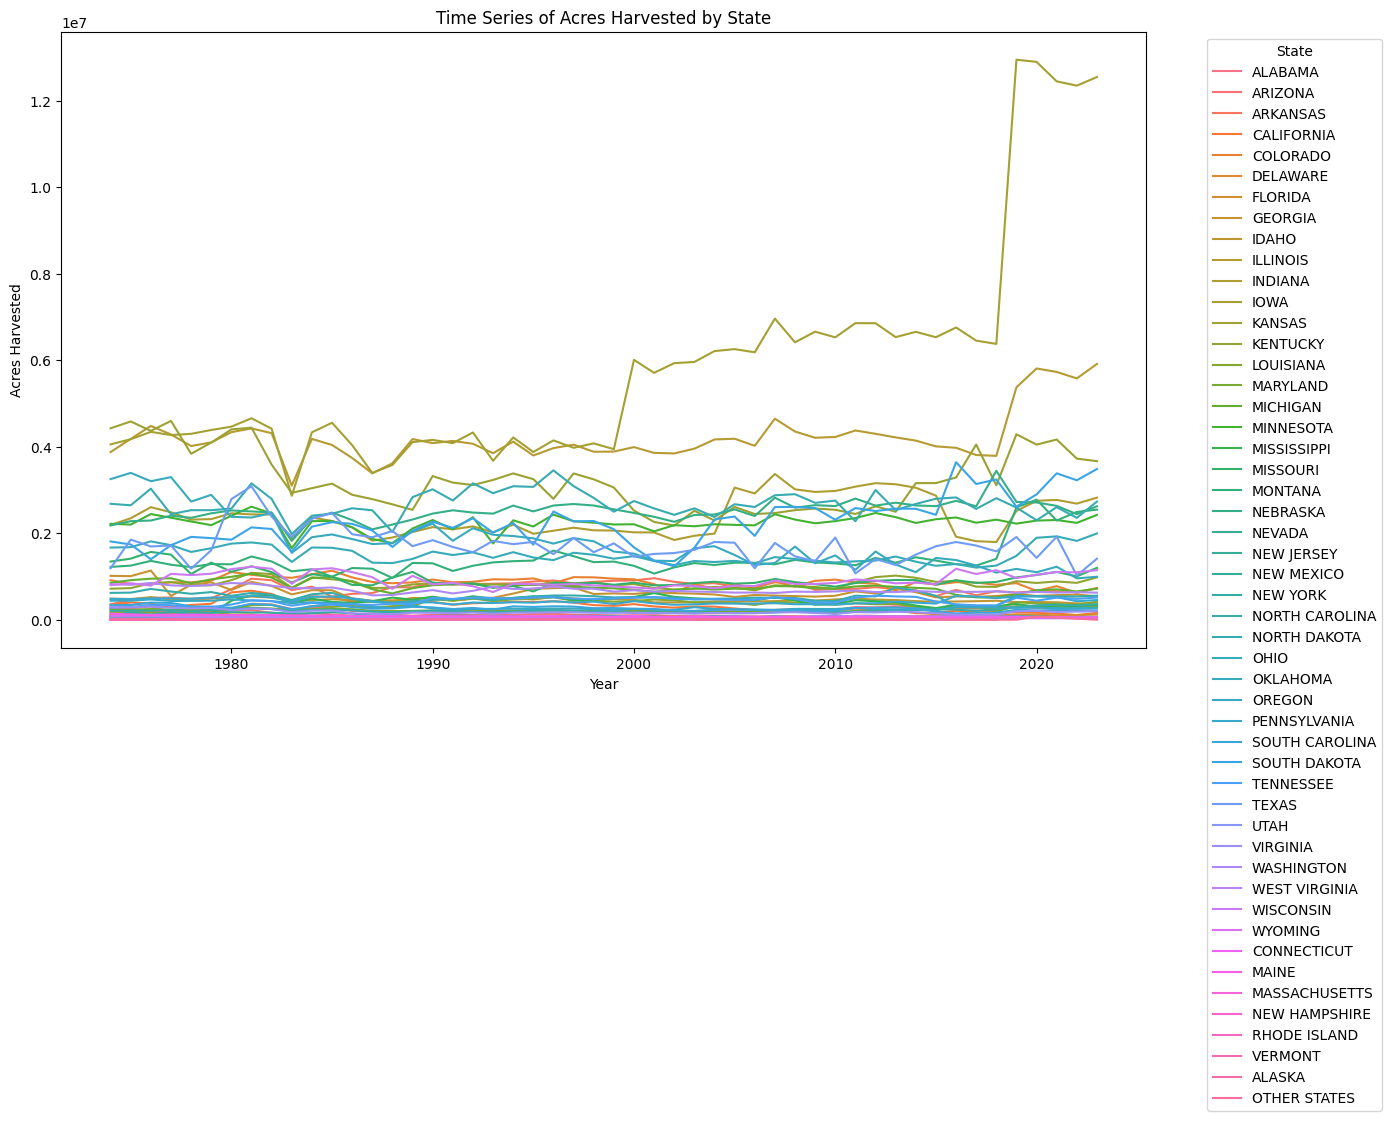

<ipython-input-57-9e57d8a96ea4>:54: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




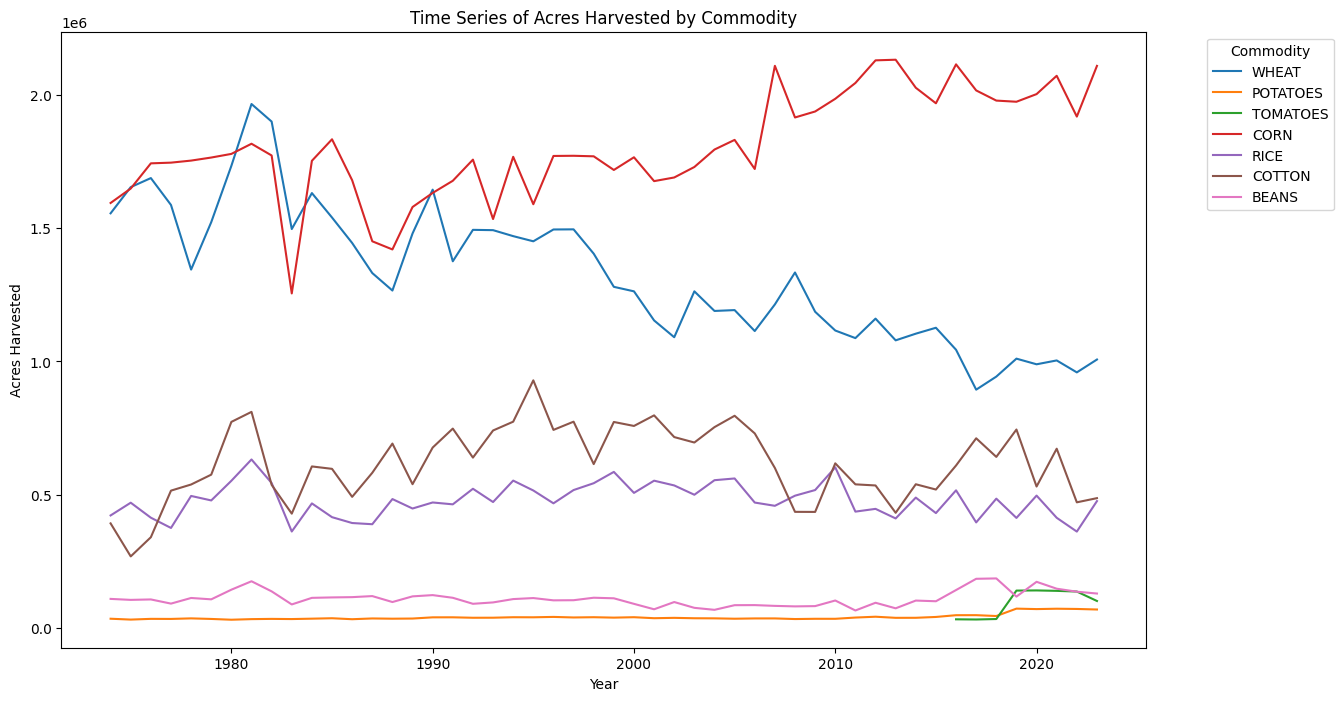

<ipython-input-57-9e57d8a96ea4>:62: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




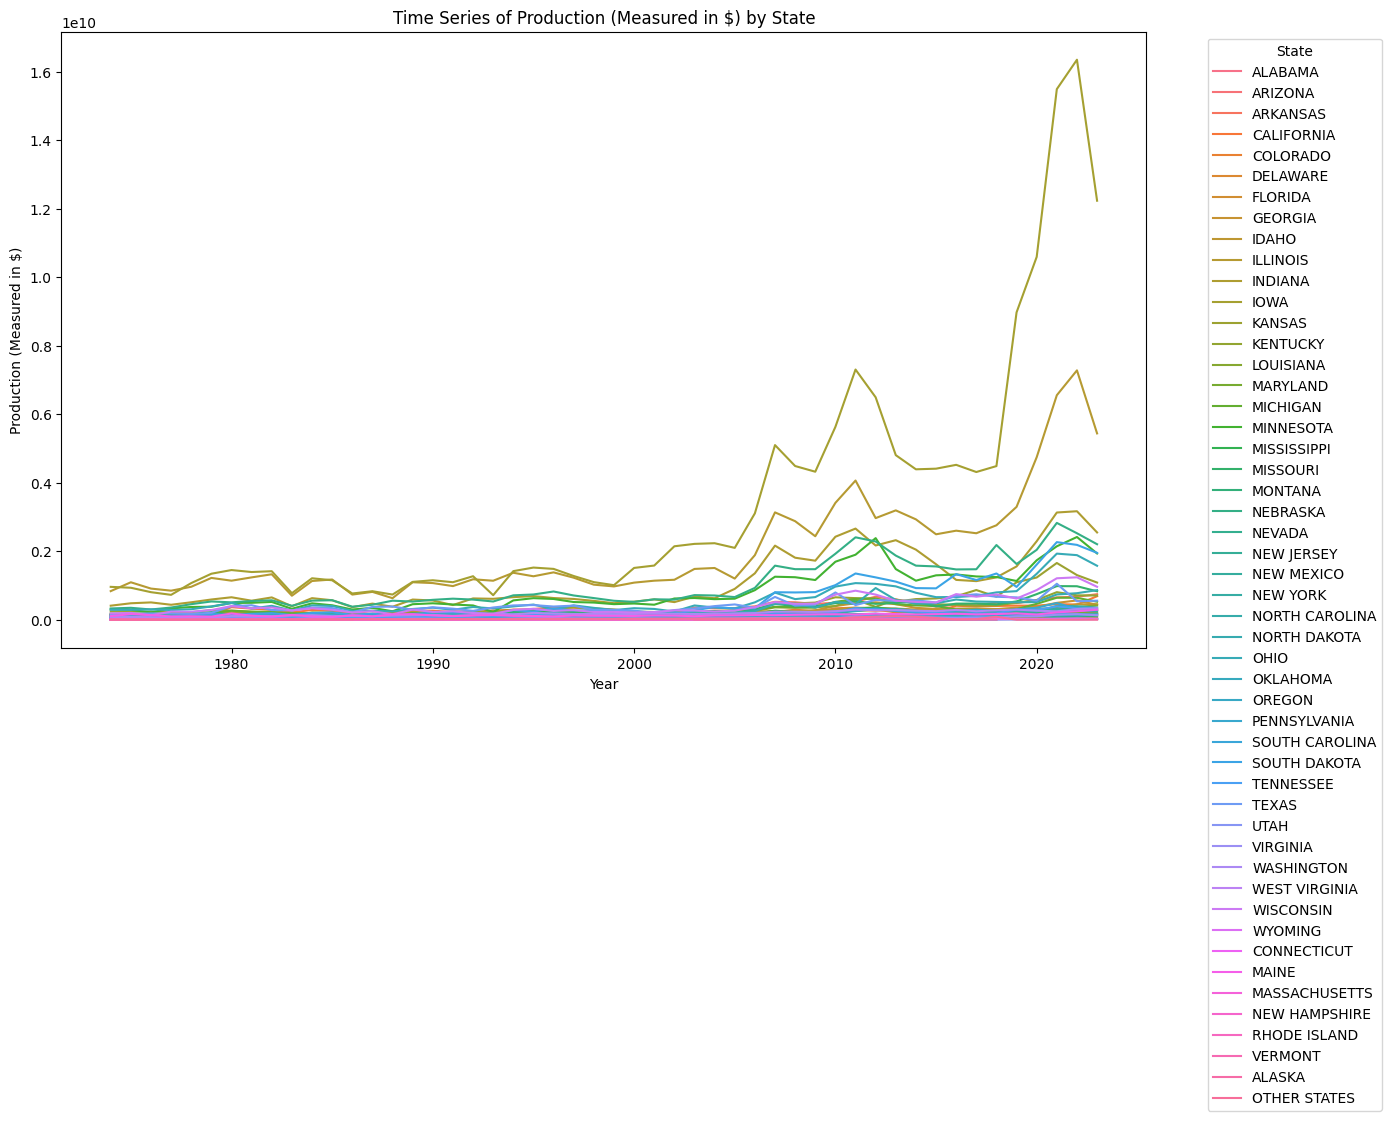

<ipython-input-57-9e57d8a96ea4>:70: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




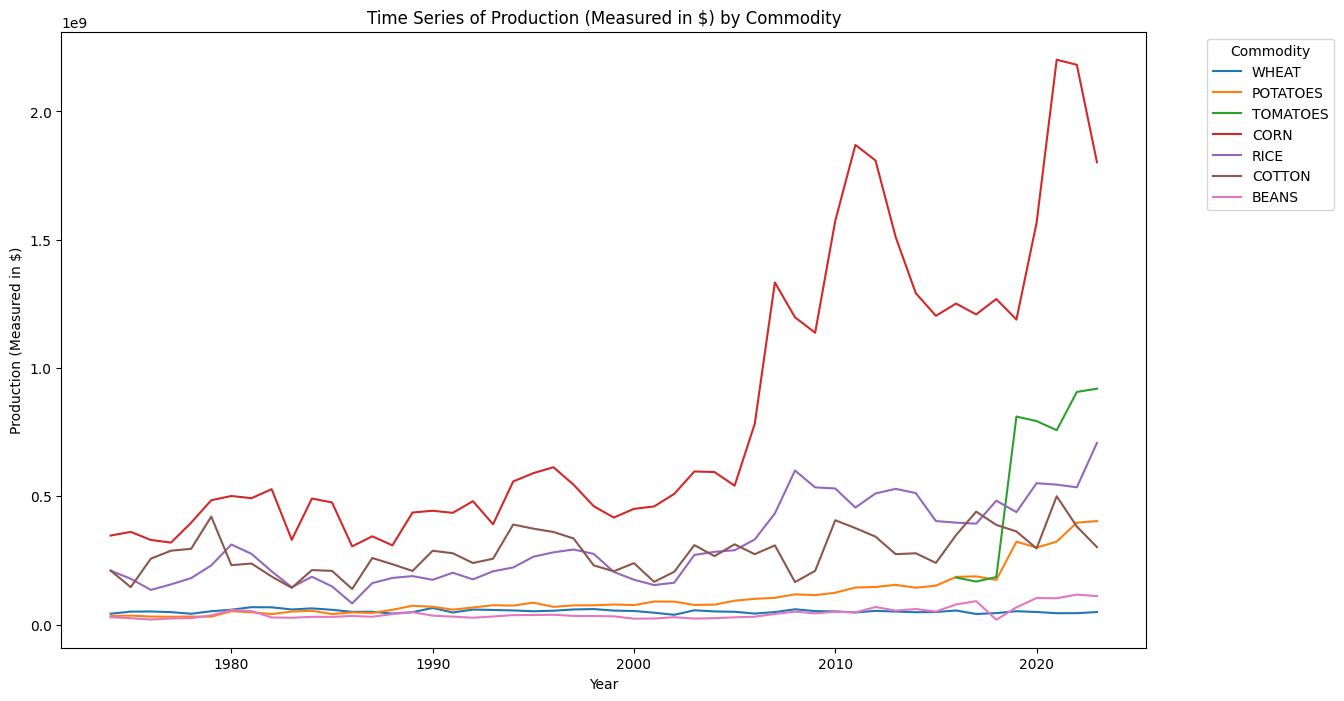

<ipython-input-57-9e57d8a96ea4>:78: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




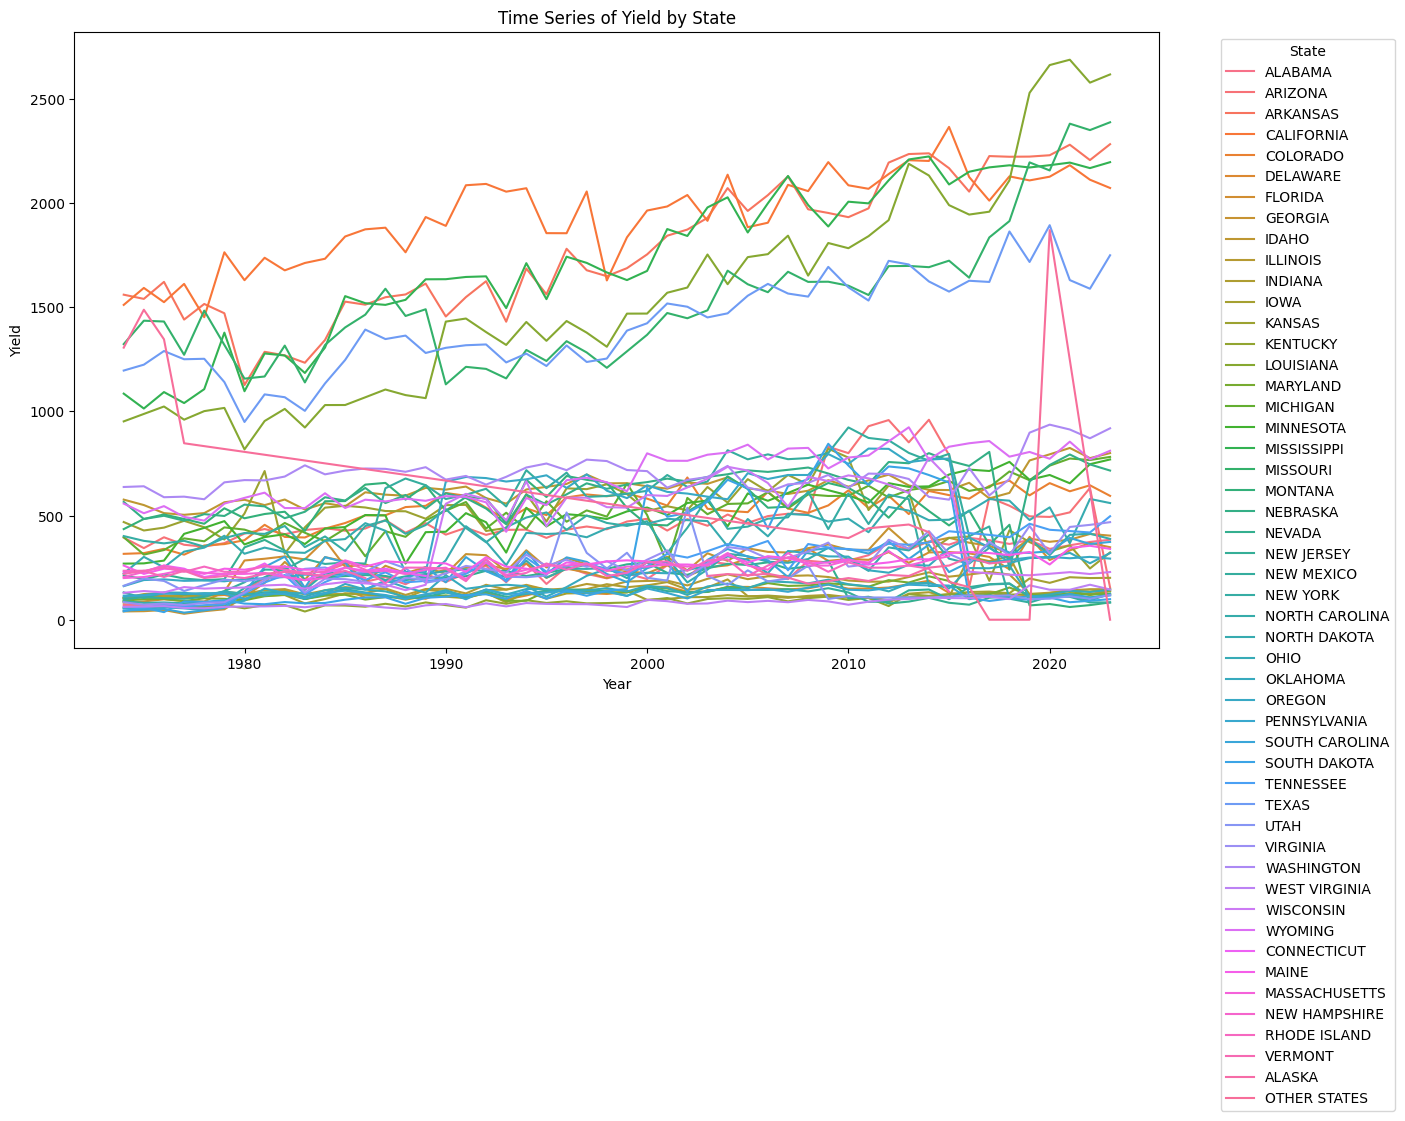

<ipython-input-57-9e57d8a96ea4>:86: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




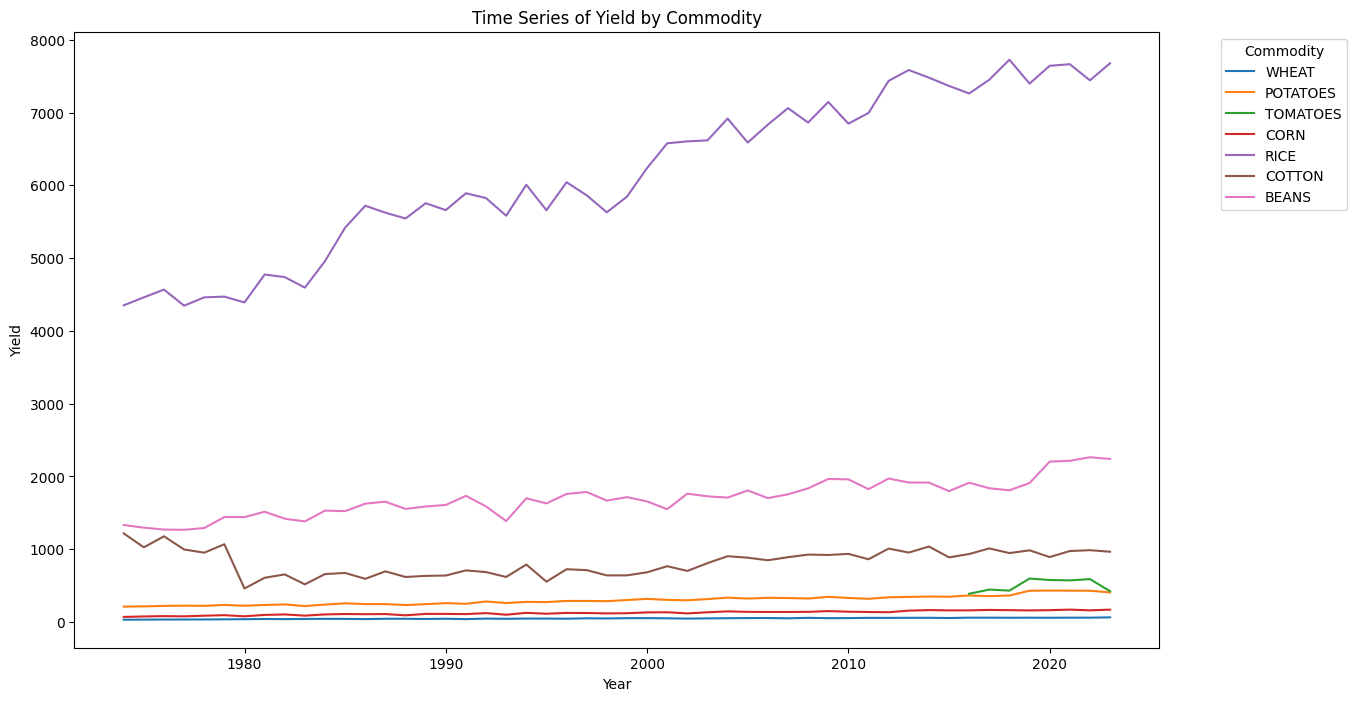

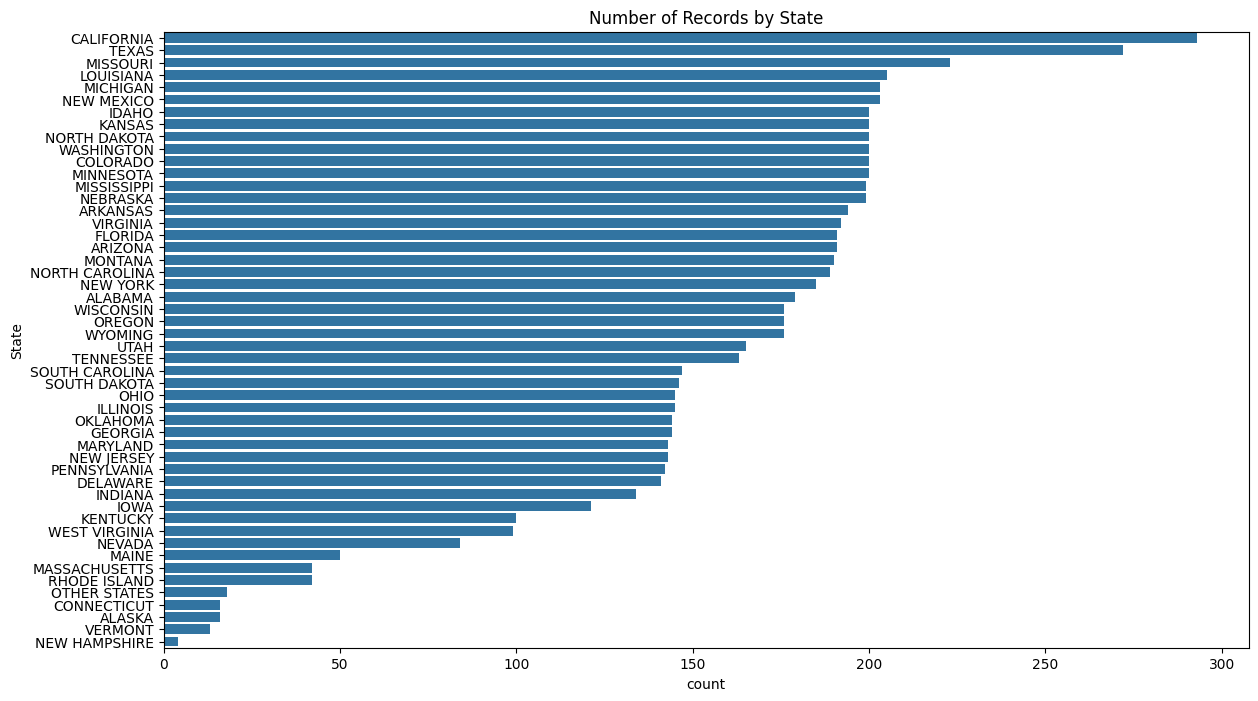

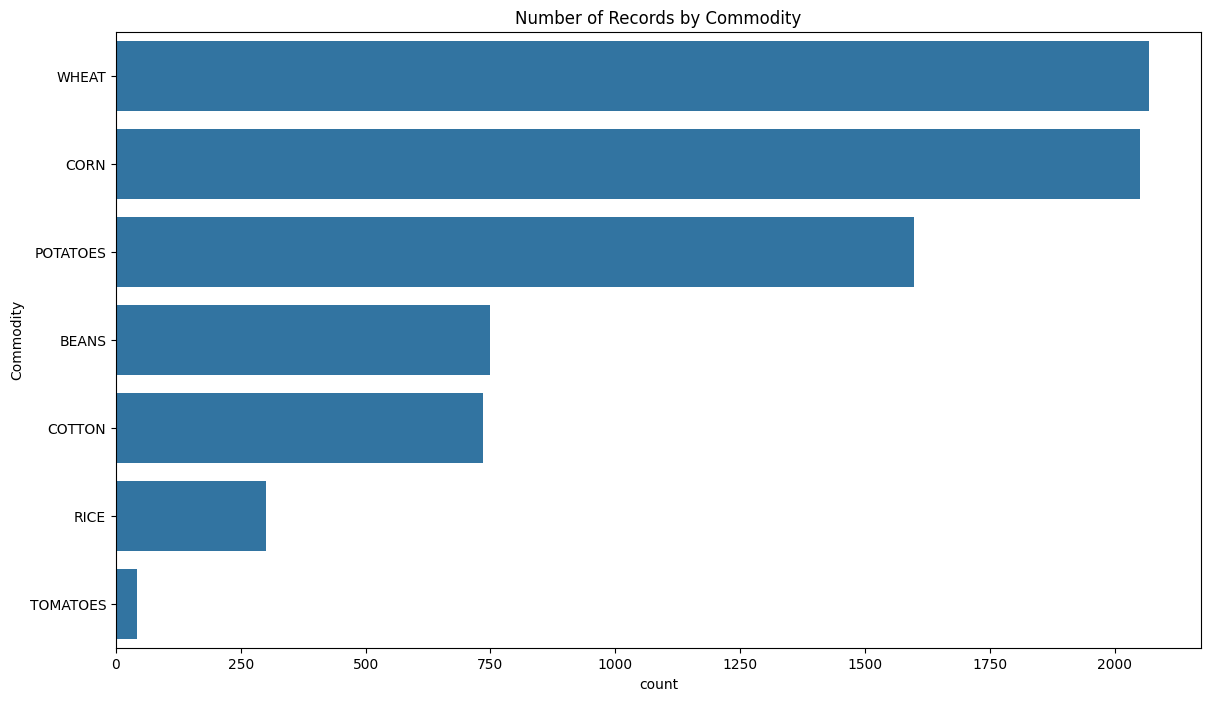

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the combined DataFrame is already created and cleaned as in previous steps

# Box plots to compare value distributions across different states and commodities
plt.figure(figsize=(14, 8))
sns.boxplot(data=combined_df, x='State', y='ACRES HARVESTED')
plt.title('Acres Harvested Distribution by State')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(14, 8))
sns.boxplot(data=combined_df, x='Commodity', y='ACRES HARVESTED')
plt.title('Acres Harvested Distribution by Commodity')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(14, 8))
sns.boxplot(data=combined_df, x='State', y='PRODUCTION, MEASURED IN $')
plt.title('Production (Measured in $) Distribution by State')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(14, 8))
sns.boxplot(data=combined_df, x='Commodity', y='PRODUCTION, MEASURED IN $')
plt.title('Production (Measured in $) Distribution by Commodity')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(14, 8))
sns.boxplot(data=combined_df, x='State', y='YIELD')
plt.title('Yield Distribution by State')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(14, 8))
sns.boxplot(data=combined_df, x='Commodity', y='YIELD')
plt.title('Yield Distribution by Commodity')
plt.xticks(rotation=90)
plt.show()

# Line plots to show trends over time for each state and commodity
plt.figure(figsize=(14, 8))
sns.lineplot(data=combined_df, x='Year', y='ACRES HARVESTED', hue='State', ci=None)
plt.title('Time Series of Acres Harvested by State')
plt.xlabel('Year')
plt.ylabel('Acres Harvested')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

plt.figure(figsize=(14, 8))
sns.lineplot(data=combined_df, x='Year', y='ACRES HARVESTED', hue='Commodity', ci=None)
plt.title('Time Series of Acres Harvested by Commodity')
plt.xlabel('Year')
plt.ylabel('Acres Harvested')
plt.legend(title='Commodity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

plt.figure(figsize=(14, 8))
sns.lineplot(data=combined_df, x='Year', y='PRODUCTION, MEASURED IN $', hue='State', ci=None)
plt.title('Time Series of Production (Measured in $) by State')
plt.xlabel('Year')
plt.ylabel('Production (Measured in $)')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

plt.figure(figsize=(14, 8))
sns.lineplot(data=combined_df, x='Year', y='PRODUCTION, MEASURED IN $', hue='Commodity', ci=None)
plt.title('Time Series of Production (Measured in $) by Commodity')
plt.xlabel('Year')
plt.ylabel('Production (Measured in $)')
plt.legend(title='Commodity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

plt.figure(figsize=(14, 8))
sns.lineplot(data=combined_df, x='Year', y='YIELD', hue='State', ci=None)
plt.title('Time Series of Yield by State')
plt.xlabel('Year')
plt.ylabel('Yield')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

plt.figure(figsize=(14, 8))
sns.lineplot(data=combined_df, x='Year', y='YIELD', hue='Commodity', ci=None)
plt.title('Time Series of Yield by Commodity')
plt.xlabel('Year')
plt.ylabel('Yield')
plt.legend(title='Commodity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Bar plots for categorical data
plt.figure(figsize=(14, 8))
sns.countplot(data=combined_df, y='State', order=combined_df['State'].value_counts().index)
plt.title('Number of Records by State')
plt.show()

plt.figure(figsize=(14, 8))
sns.countplot(data=combined_df, y='Commodity', order=combined_df['Commodity'].value_counts().index)
plt.title('Number of Records by Commodity')
plt.show()

Facet Grid

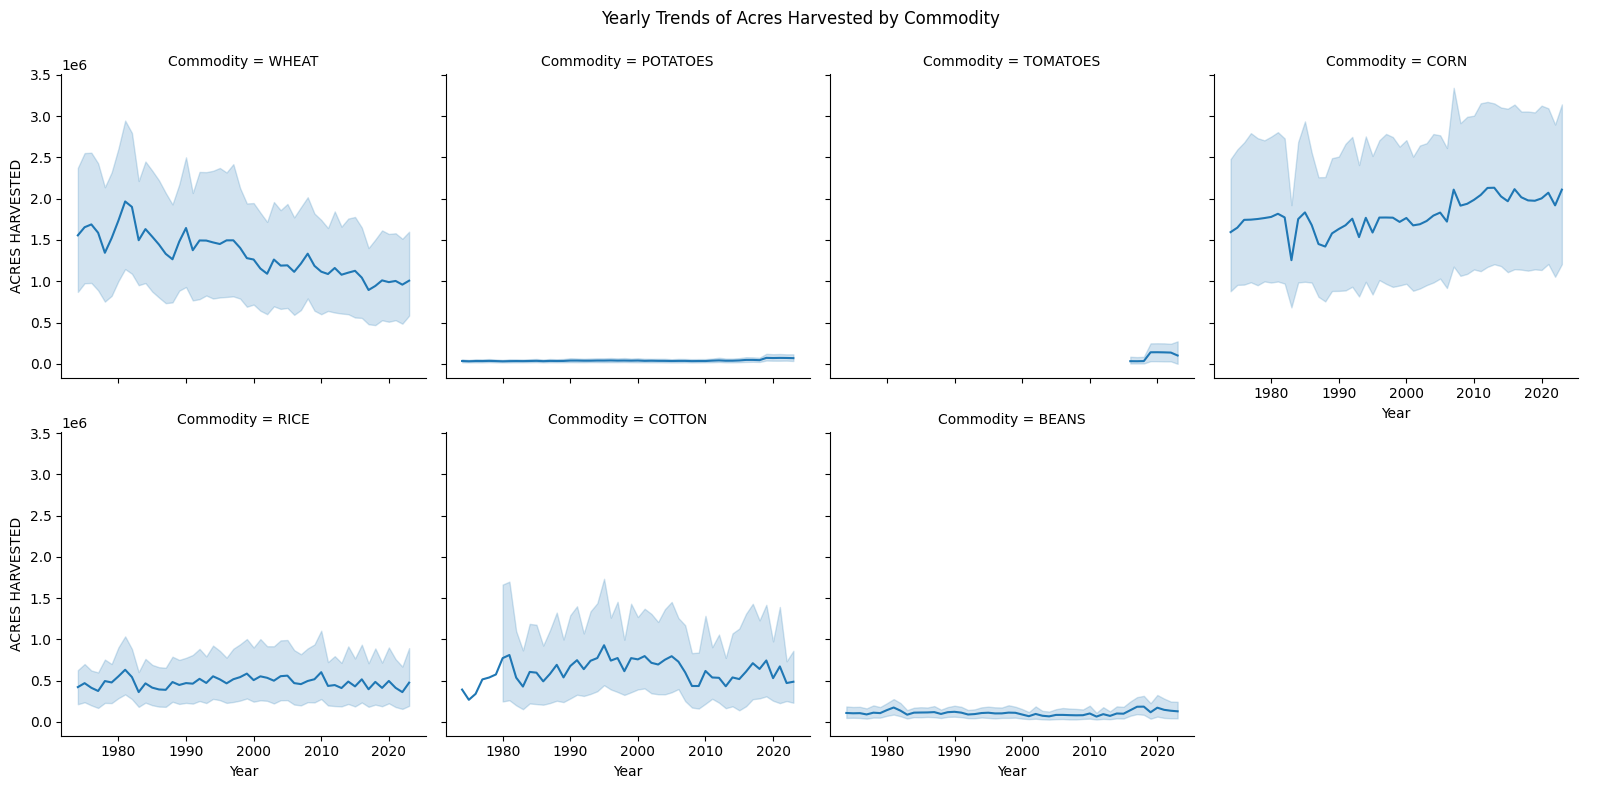

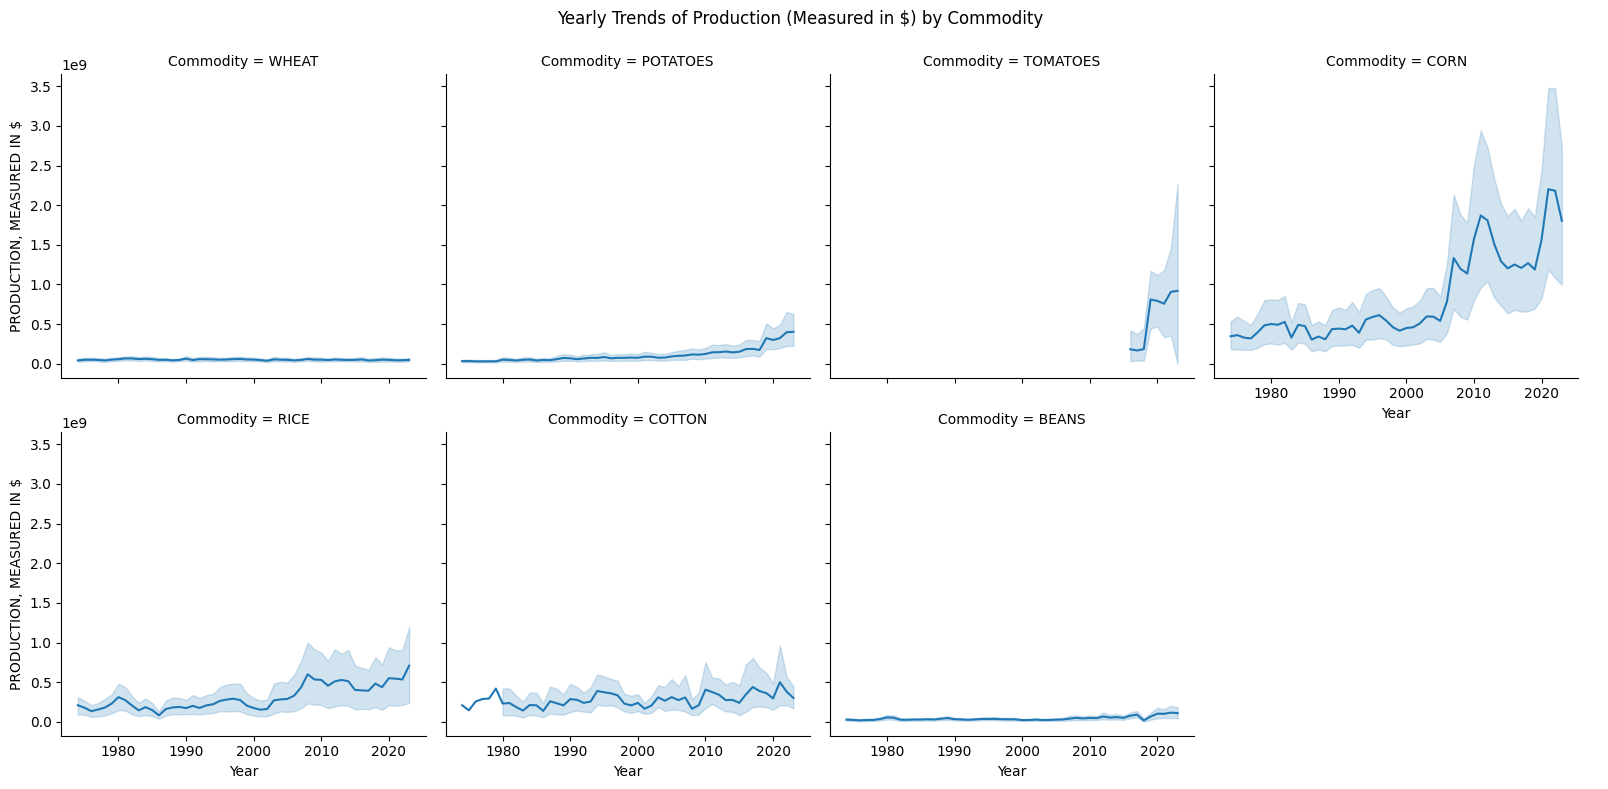

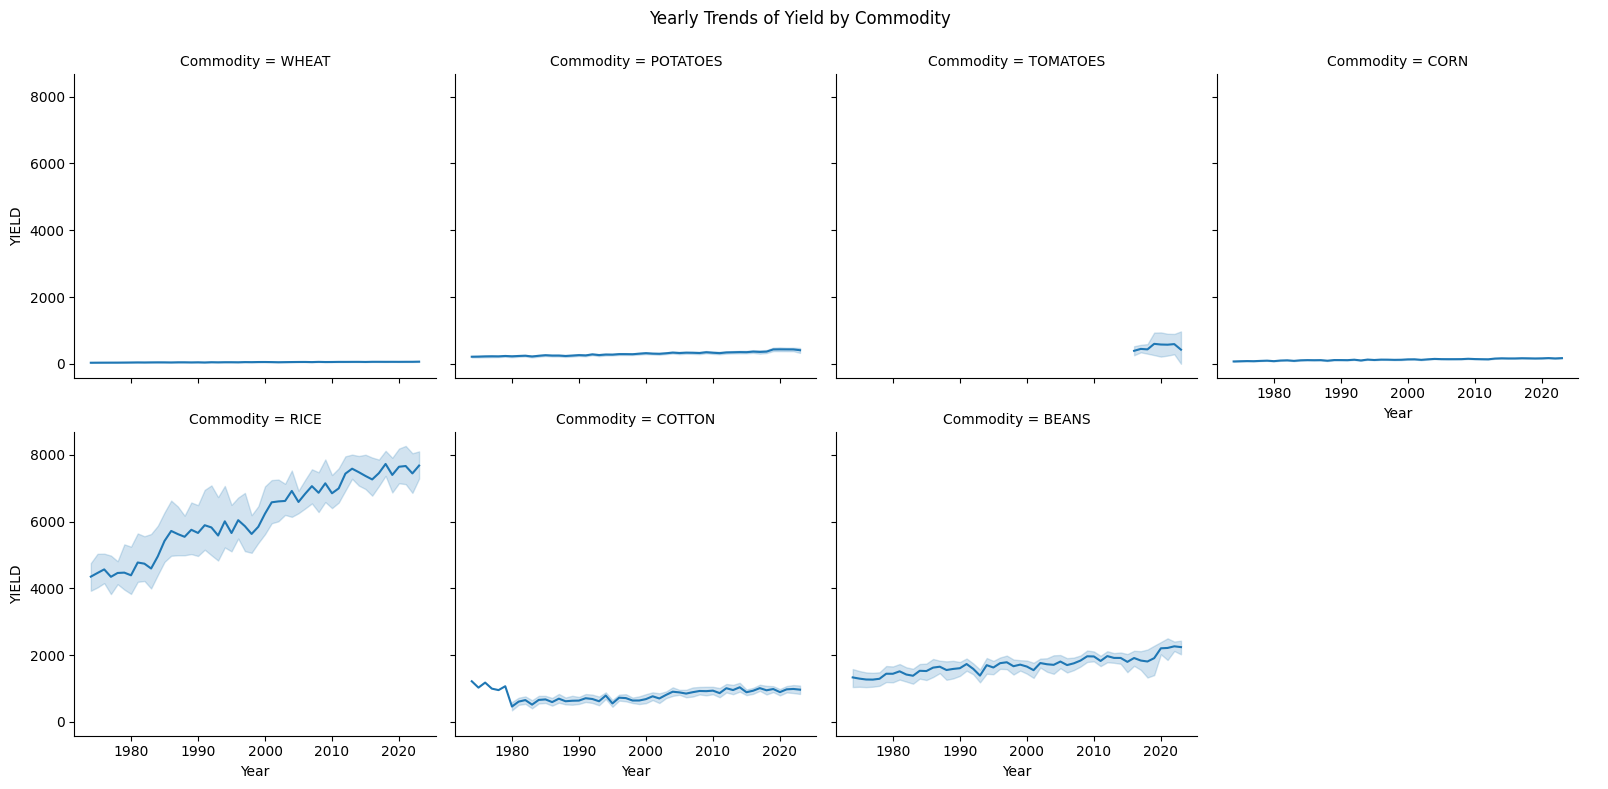

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Facet Grid for Commodity and Yearly Acres Harvested Trends
g = sns.FacetGrid(combined_df, col="Commodity", col_wrap=4, height=4)
g.map(sns.lineplot, "Year", "ACRES HARVESTED")
g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Yearly Trends of Acres Harvested by Commodity')
plt.show()

# Facet Grid for Commodity and Yearly Production Trends
g = sns.FacetGrid(combined_df, col="Commodity", col_wrap=4, height=4)
g.map(sns.lineplot, "Year", "PRODUCTION, MEASURED IN $")
g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Yearly Trends of Production (Measured in $) by Commodity')
plt.show()

# Facet Grid for Commodity and Yearly Yield Trends
g = sns.FacetGrid(combined_df, col="Commodity", col_wrap=4, height=4)
g.map(sns.lineplot, "Year", "YIELD")
g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Yearly Trends of Yield by Commodity')
plt.show()

Pair Plot

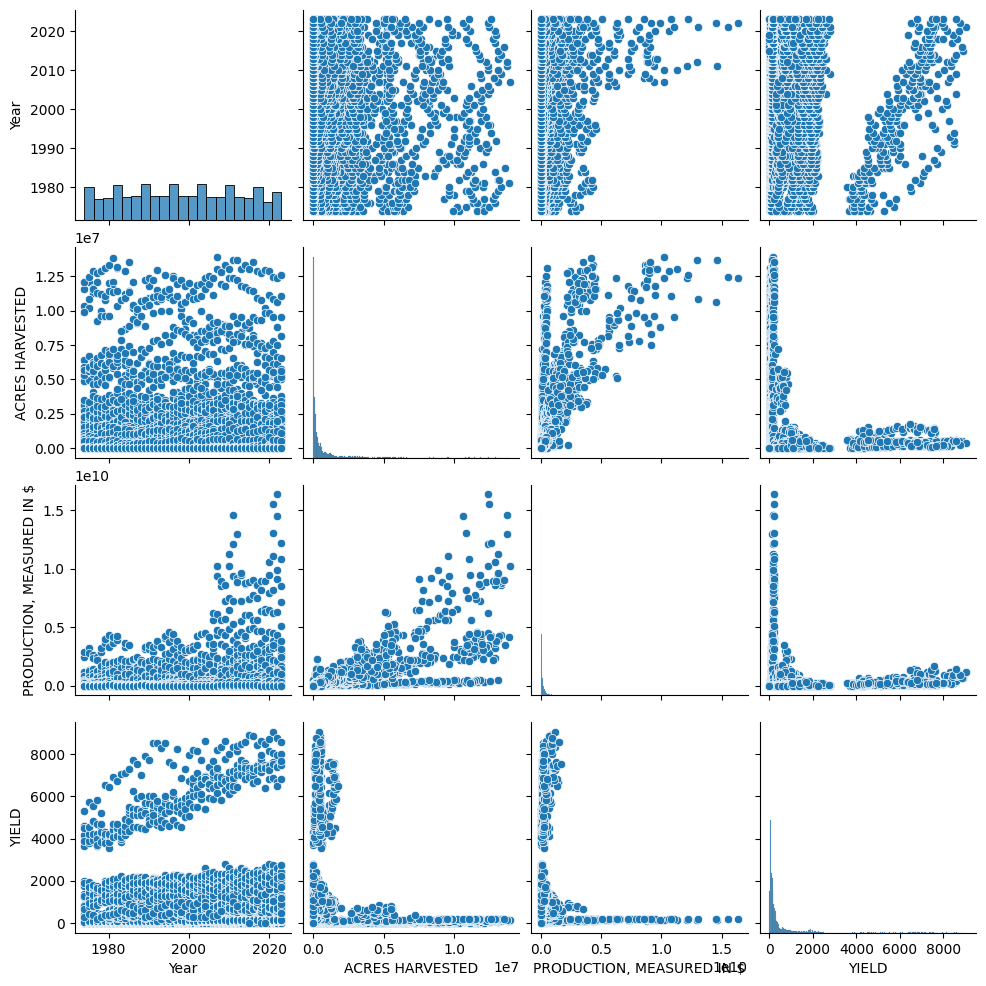

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting a subset of numeric columns for pairplot
numeric_columns = ['Year', 'ACRES HARVESTED', 'PRODUCTION, MEASURED IN $', 'YIELD']
sns.pairplot(combined_df[numeric_columns])
plt.show()

Violin Plot

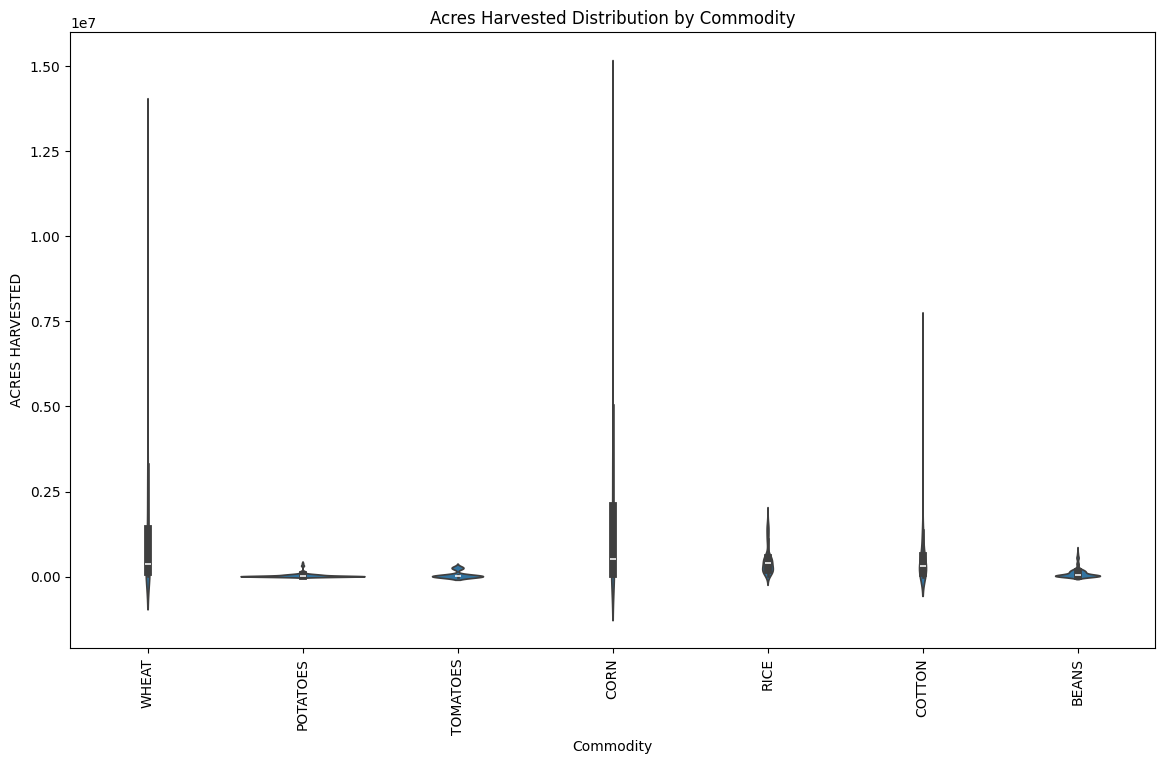

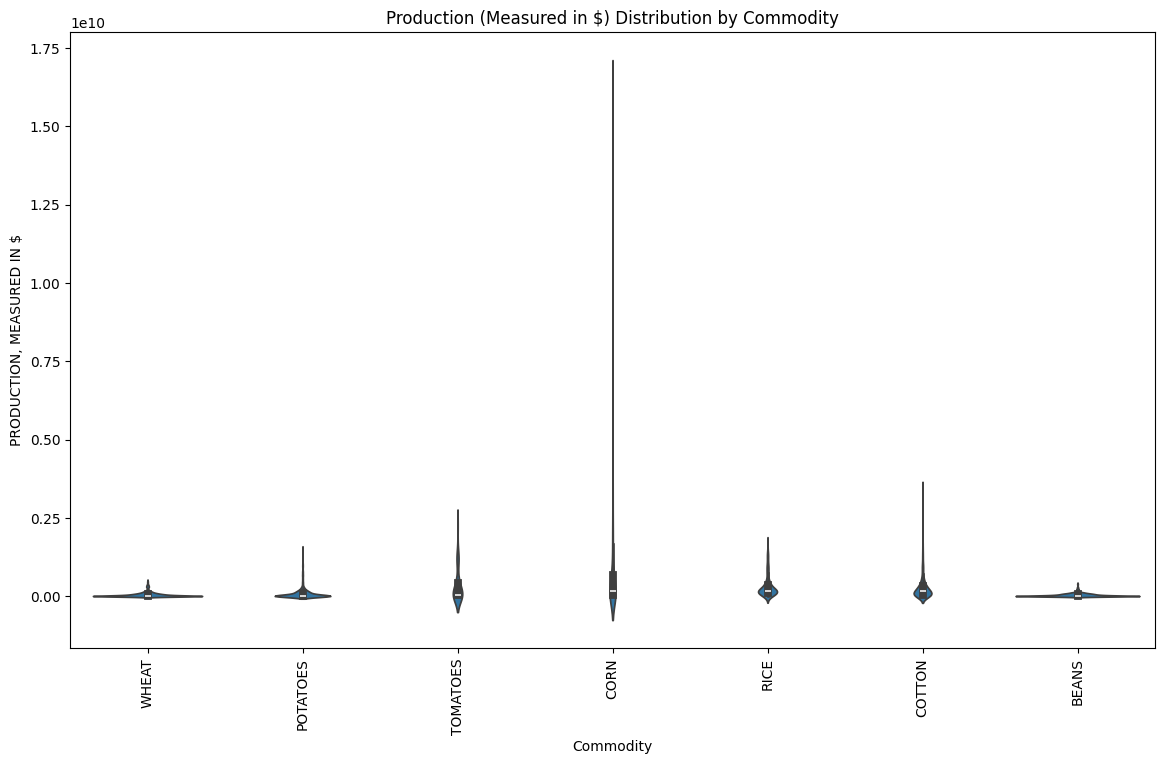

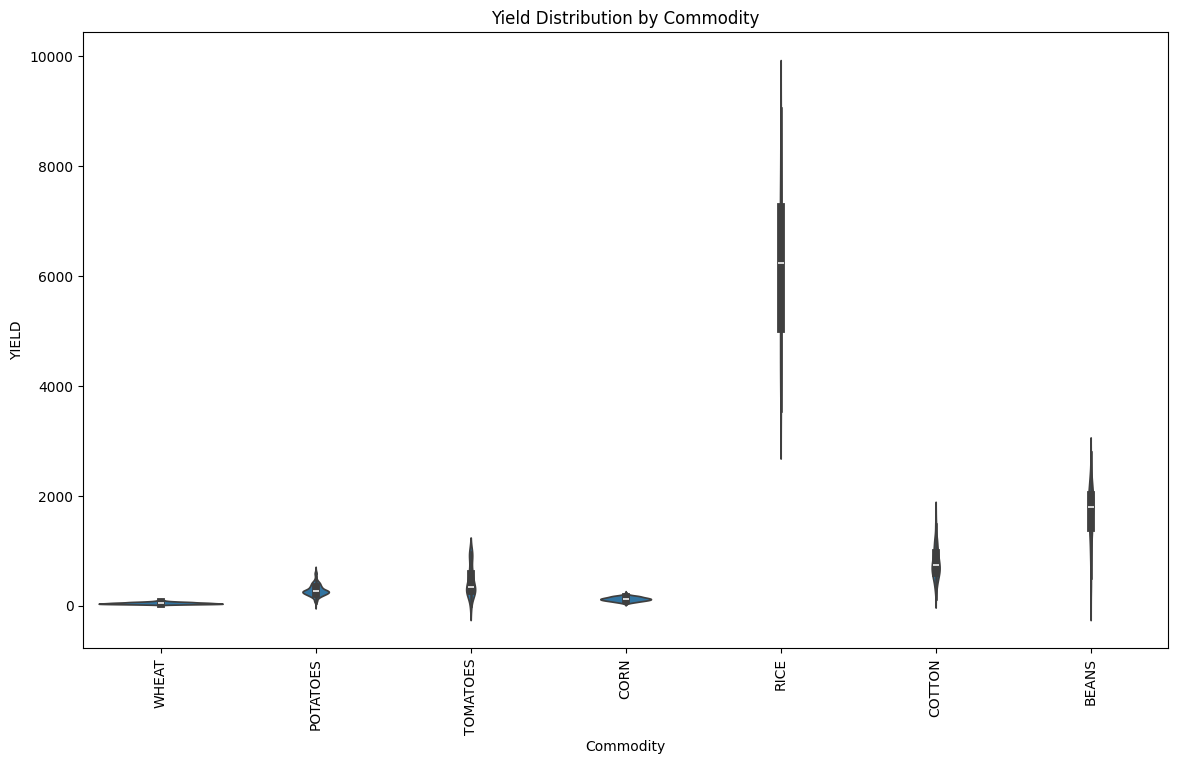

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Violin Plot for Acres Harvested distributions across Commodities
plt.figure(figsize=(14, 8))
sns.violinplot(data=combined_df, x='Commodity', y='ACRES HARVESTED')
plt.title('Acres Harvested Distribution by Commodity')
plt.xticks(rotation=90)
plt.show()

# Violin Plot for Production (Measured in $) distributions across Commodities
plt.figure(figsize=(14, 8))
sns.violinplot(data=combined_df, x='Commodity', y='PRODUCTION, MEASURED IN $')
plt.title('Production (Measured in $) Distribution by Commodity')
plt.xticks(rotation=90)
plt.show()

# Violin Plot for Yield distributions across Commodities
plt.figure(figsize=(14, 8))
sns.violinplot(data=combined_df, x='Commodity', y='YIELD')
plt.title('Yield Distribution by Commodity')
plt.xticks(rotation=90)
plt.show()